# Project 3 : Supervised Learning - Classification - Personal Loan Campaign

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 12/17/2021
---

# Description

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

---

### 1. Import  Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To get US ZIP Code details
from uszipcode import SearchEngine  # , SimpleZipcode, Zipcode

# To build Logistic Regression model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To build Decision Tree model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

### 2. Load Data

In [2]:
# Read data from csv file using pandas and create DataFrame object
loan_data = pd.read_csv("Loan_Modelling.csv", index_col=0)

<IPython.core.display.Javascript object>

### 3. View Data

In [3]:
# checking number of columns and rows
print(f"There are {loan_data.shape[0]} rows and {loan_data.shape[1]} columns.")

There are 5000 rows and 13 columns.


<IPython.core.display.Javascript object>

In [4]:
# Check datatypes of each columns
loan_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. All columns are numeric data type
3. Only one column "CCAvg" is float datatype
4. All other columns are integer datatypes

In [5]:
# Additional check on data for null values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 1 to 5000. Total rows is 5000
2. Column index is from 0 to 12. Total columns is 13
3. There are no null values in columns
4. All columns are numerical
5. **The target variable is "Personal_Loan"**

In [6]:
# Check head
loan_data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4    1.6          1         0   
2    45          19      34    90089       3    1.5          1         0   
3    39          15      11    94720       1    1.0          1         0   
4    35           9     100    94112       1    2.7          2         0   
5    35           8      45    91330       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

<IPython.core.display.Javascript object>

In [7]:
# Check tail
loan_data.tail()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4996   29           3      40    92697       1    1.9          3         0   
4997   30           4      15    92037       4    0.4          1        85   
4998   63          39      24    93023       2    0.3          3         0   
4999   65          40      49    90034       3    0.5          2         0   
5000   28           4      83    92612       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
4996              0                   0           0       1           0  
4997              0                   0           0       1           0  
4998              0                   0           0       0           0  
4999              0                   0           0       1           0  
5000              0                   0           0       1           1

<IPython.core.display.Javascript object>

In [8]:
# Check sample
loan_data.sample(5)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4021   58          32     191    93943       4    5.2          3       194   
4419   59          34     145    95125       4    1.8          1       198   
4156   55          30      28    90291       4    0.1          3       149   
2654   30           5     121    94555       2    3.1          1       408   
3177   48          24      14    91330       3    0.4          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
4021              1                   0           0       0           1  
4419              1                   0           0       1           0  
4156              0                   0           0       1           1  
2654              0                   0           0       1           0  
3177              0                   0           0       1           0

<IPython.core.display.Javascript object>

#### Observation : 
1. All columns are numerical. 
2. There are no object datatypes for any feature engineering.
3. Index is customer ID.
4. Columns "Age" and "Experience" are in years.
5. Columns "Income", "CCAvg" and "Mortgage" are in thousand dollars.
6. Columns "ZIP Code", "Family", "Education", "Securities_Account", "CD_Account", "Online" and "Credit Card" seems to be categorical variables even though values are numerical
7. Column "Personal_Loan" is numerical and categorical variable. **It also seems to be target variable.**


In [9]:
# Check basic summary
loan_data.describe(include="all").T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no missing values
2. Columns ZIP Code", "Family", "Education", "Securities_Account", "CD_Account", "Online" and "Credit Card" are numerical and can be categorical.
3. Columns "Age", "Experience", "Income", "CCAvg" and "Mortgage" are numerical and can be continous variables.


### 4. Exploratory Data Analysis

#### A. Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, column, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="Lightblue")
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, palette="Blues"
    ) if bins else sns.histplot(data=data, x=column, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[column].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[column].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=13)
    ax = sns.countplot(
        data=data,
        x=column,
        palette="Paired",
        order=data[column].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

In [12]:
# Check datatypes of columns and apply above function to numerical columns
loan_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

##### Univariate Analysis - Column "Age"

In [13]:
# Basic summary
loan_data[["Age"]].describe()

Age
count  5000.000000
mean     45.338400
std      11.463166
min      23.000000
25%      35.000000
50%      45.000000
75%      55.000000
max      67.000000

<IPython.core.display.Javascript object>

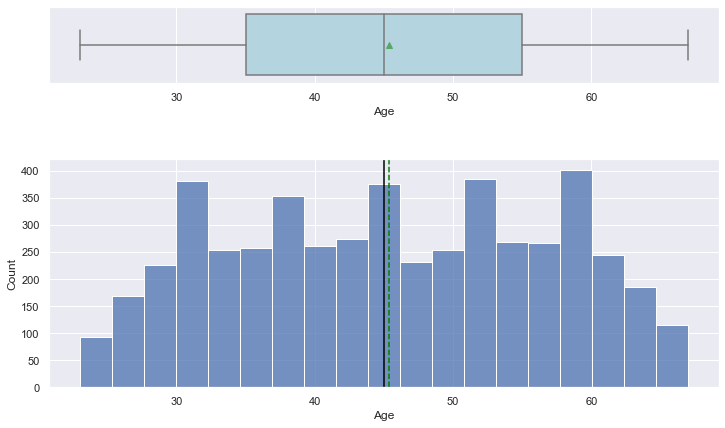

<IPython.core.display.Javascript object>

In [14]:
# Visualize data through plot
hist_boxplot(loan_data, "Age")

#### Observation of  column "Age": 
1. It looks like a normal distribution.
2. It is not skewed
3. It has no outliers
4. Mean and Median are almost same
5. Mean is 45.338400 and median is 45

##### Univariate Analysis - Column "Experience"

In [15]:
# Basic summary
loan_data[["Experience"]].describe()

Experience
count  5000.000000
mean     20.104600
std      11.467954
min      -3.000000
25%      10.000000
50%      20.000000
75%      30.000000
max      43.000000

<IPython.core.display.Javascript object>

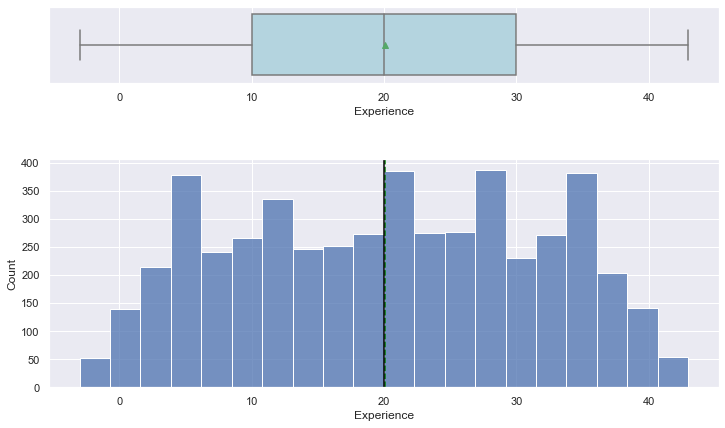

<IPython.core.display.Javascript object>

In [16]:
# Visualize data through plot
hist_boxplot(loan_data, "Experience")

#### Observation of  column "Experience": 
1. It looks like a normal distribution.
2. It is not skewed
3. It has no outliers
4. Mean and Median are almost same
5. Mean is 20.104600 and median is 20

##### Univariate Analysis - Column "Income"

In [17]:
# Basic summary
loan_data[["Income"]].describe()

Income
count  5000.000000
mean     73.774200
std      46.033729
min       8.000000
25%      39.000000
50%      64.000000
75%      98.000000
max     224.000000

<IPython.core.display.Javascript object>

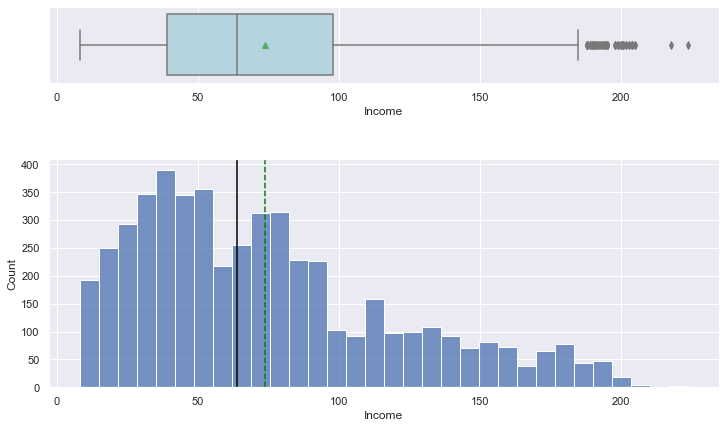

<IPython.core.display.Javascript object>

In [18]:
# Visualize data through plot
hist_boxplot(loan_data, "Income")

#### Observation of  column "Income": 
1. It doesnt looks like a normal distribution.
2. It is right skewed
3. **It has outliers and treatment is required**
4. Mean and Median are not same
5. Mean is 73.774200 and median is 64

##### Univariate Analysis - Column "ZIPCode"

In [19]:
# Basic summary
loan_data[["ZIPCode"]].describe()

ZIPCode
count   5000.000000
mean   93169.257000
std     1759.455086
min    90005.000000
25%    91911.000000
50%    93437.000000
75%    94608.000000
max    96651.000000

<IPython.core.display.Javascript object>

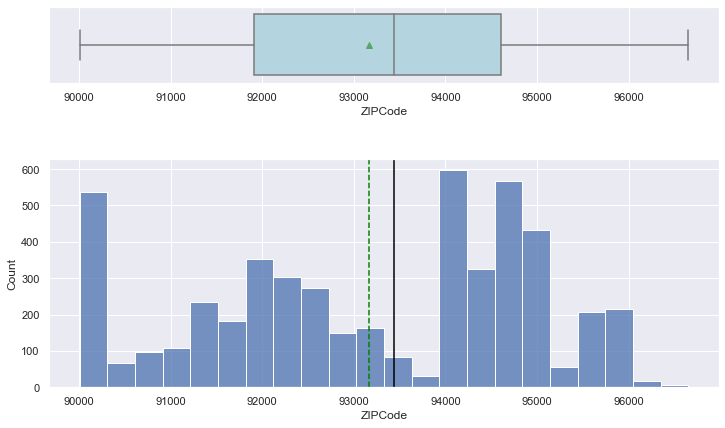

<IPython.core.display.Javascript object>

In [20]:
# Visualize data through plot
hist_boxplot(loan_data, "ZIPCode")

#### Observation of  column "ZIPCode": 
1. It doesnt looks like a normal distribution.
2. It is not skewed
3. It has no outliers
4. Mean and Median are not same
5. Mean is 93169.257000 and median is 93437
6. **It should be categorical. But, there are too many values for a categorical variable. So need to utilize features of uszipcode library**

##### Univariate Analysis - Column "Family"

In [21]:
# Basic summary
loan_data[["Family"]].describe()

Family
count  5000.000000
mean      2.396400
std       1.147663
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000

<IPython.core.display.Javascript object>

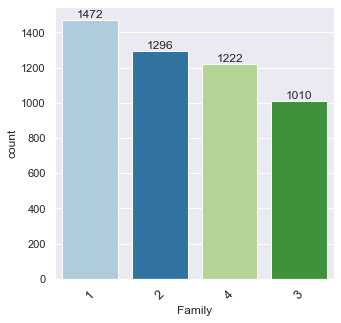

<IPython.core.display.Javascript object>

In [22]:
# Visualize data through plot
labeled_barplot(loan_data, "Family")

#### Observation of  column "Family": 
1. This is a numerical column
2. **It has few values, but, are in sequential order. So its better to leave this column as numerical**
3. **Most of customers have Family size 1.**

##### Univariate Analysis - Column "CCAvg"

In [23]:
# Basic summary
loan_data[["CCAvg"]].describe()

CCAvg
count  5000.000000
mean      1.937938
std       1.747659
min       0.000000
25%       0.700000
50%       1.500000
75%       2.500000
max      10.000000

<IPython.core.display.Javascript object>

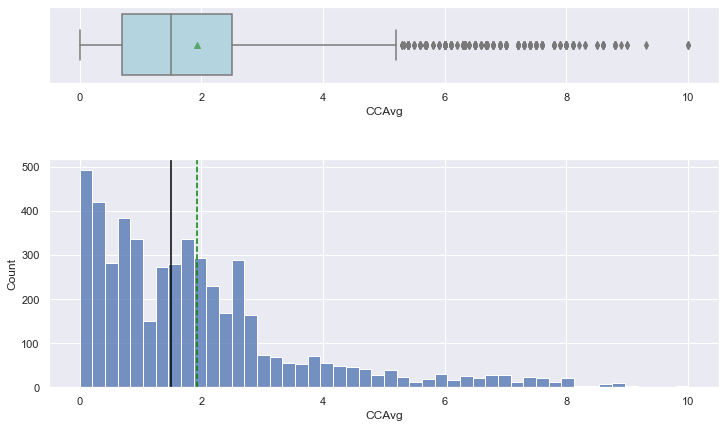

<IPython.core.display.Javascript object>

In [24]:
# Visualize data through plot
hist_boxplot(loan_data, "CCAvg")

#### Observation of  column "CCAvg": 
1. It doesnt looks like a normal distribution.
2. It is right skewed
3. **It has outliers and treatment is required**
4. Mean and Median are not same
5. Mean is 1.937938 and median is 1.5

##### Univariate Analysis - Column "Education"

In [25]:
# Basic summary
loan_data[["Education"]].describe()

Education
count  5000.000000
mean      1.881000
std       0.839869
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

<IPython.core.display.Javascript object>

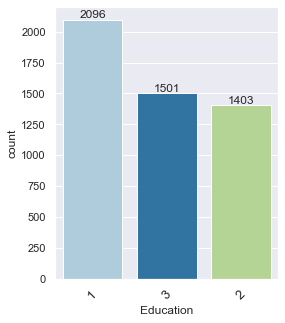

<IPython.core.display.Javascript object>

In [26]:
# Visualize data through plot
labeled_barplot(loan_data, "Education")

#### Observation of  column "Education": 
1. This is a numerical column
2. Data dictionary says Education is categorized as 1: Undergrad; 2: Graduate;3: Advanced/Professional. **So need to update categorical values into column "Education"**
3. It can be converted into categorical column
4. **Most of customers are "Undergrad".**

##### Univariate Analysis - Column "Mortgage"

In [27]:
# Basic summary
loan_data[["Mortgage"]].describe()

Mortgage
count  5000.000000
mean     56.498800
std     101.713802
min       0.000000
25%       0.000000
50%       0.000000
75%     101.000000
max     635.000000

<IPython.core.display.Javascript object>

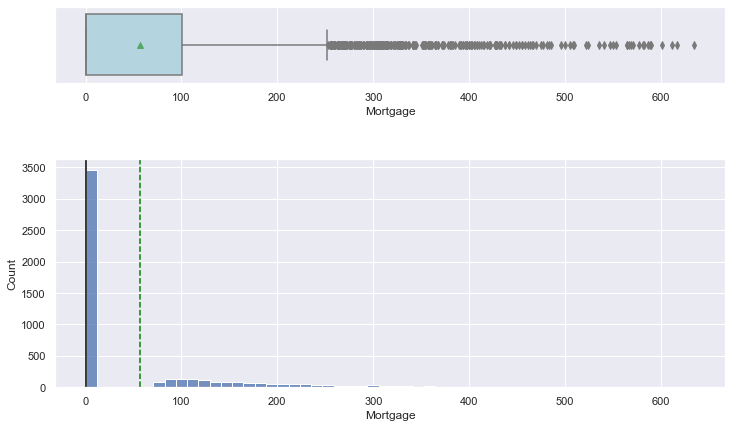

<IPython.core.display.Javascript object>

In [28]:
# Visualize data through plot
hist_boxplot(loan_data, "Mortgage")

#### Observation of  column "Mortgage": 
1. It doesnt looks like a normal distribution.
2. It is heavily right skewed
3. It has lot of outliers
4. Mean and Median are not same
5. Mean is 56.498800 and median is 0
6. Standard deviation is very high at 101.713802
6. **Almost 3500 rows from total 5000 rows are zero values. It may be genuine because customers may not have taken mortgage. So this data can be classified as whether mortgage was taken or not**

##### Univariate Analysis - Column "Personal_Loan"

In [29]:
# Basic summary
loan_data[["Personal_Loan"]].describe()

Personal_Loan
count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

<IPython.core.display.Javascript object>

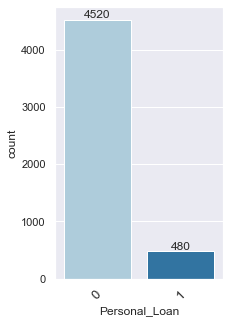

<IPython.core.display.Javascript object>

In [30]:
# Visualize data through plot
labeled_barplot(loan_data, "Personal_Loan")

#### Observation of  column "Personal_Loan": 
1. **This is the target variable**
2. It is a numerical column. But, it has only two values "0" and "1"
3. It can be converted into categorical column. Its fine because both Logistic Regression and Decision Tree algorithm can predict categorical variables
4. **Most of customers did not accept Personal Loan in last campaign. Target is to get more customers to accept Personal Loan.**

##### Univariate Analysis - Column "Securities_Account"

In [31]:
# Basic summary
loan_data[["Securities_Account"]].describe()

Securities_Account
count         5000.000000
mean             0.104400
std              0.305809
min              0.000000
25%              0.000000
50%              0.000000
75%              0.000000
max              1.000000

<IPython.core.display.Javascript object>

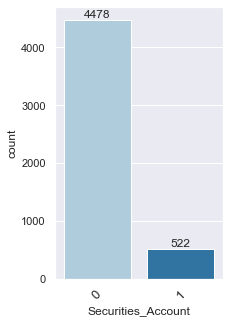

<IPython.core.display.Javascript object>

In [32]:
# Visualize data through plot
labeled_barplot(loan_data, "Securities_Account")

#### Observation of  column "Securities_Account": 
1. It is a numerical column. But, it has only two values "0" and "1"
2. It can be converted into categorical column.
3. **Most of customers do not have Securities Account.**

##### Univariate Analysis - Column "CD_Account"

In [33]:
# Basic summary
loan_data[["CD_Account"]].describe()

CD_Account
count  5000.00000
mean      0.06040
std       0.23825
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000

<IPython.core.display.Javascript object>

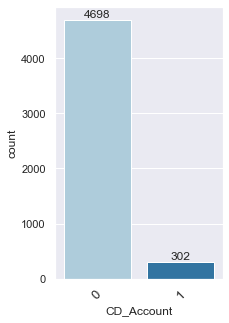

<IPython.core.display.Javascript object>

In [34]:
# Visualize data through plot
labeled_barplot(loan_data, "CD_Account")

#### Observation of  column "CD_Account": 
1. It is a numerical column. But, it has only two values "0" and "1"
2. It can be converted into categorical column.
3. **Most of customers do not have CD Account.**

##### Univariate Analysis - Column "Online"

In [35]:
# Basic summary
loan_data[["Online"]].describe()

Online
count  5000.000000
mean      0.596800
std       0.490589
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

<IPython.core.display.Javascript object>

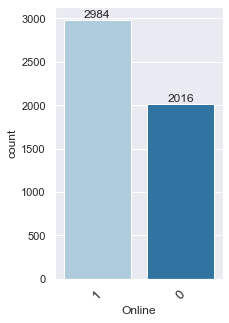

<IPython.core.display.Javascript object>

In [36]:
# Visualize data through plot
labeled_barplot(loan_data, "Online")

#### Observation of  column "Online": 
1. It is a numerical column. But, it has only two values "0" and "1"
2. It can be converted into categorical column.
3. **Most of customers do use Online banking.**

##### Univariate Analysis - Column "CreditCard"

In [37]:
# Basic summary
loan_data[["CreditCard"]].describe()

CreditCard
count  5000.000000
mean      0.294000
std       0.455637
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

<IPython.core.display.Javascript object>

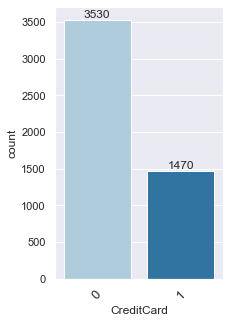

<IPython.core.display.Javascript object>

In [38]:
# Visualize data through plot
labeled_barplot(loan_data, "CreditCard")

#### Observation of  column "CreditCard": 
1. It is a numerical column. But, it has only two values "0" and "1"
2. It can be converted into categorical column.
3. **Most of customers do not use CreditCard.**

#### B. Bivariate & Multivariate Analysis

In [39]:
# Get column and its datatypes for bivariate analysis
loan_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

In [40]:
# Get correlation between each numerical feature
loan_data.corr()

Age  Experience    Income   ZIPCode    Family  \
Age                 1.000000    0.994215 -0.055269 -0.030530 -0.046418   
Experience          0.994215    1.000000 -0.046574 -0.030456 -0.052563   
Income             -0.055269   -0.046574  1.000000 -0.030709 -0.157501   
ZIPCode            -0.030530   -0.030456 -0.030709  1.000000  0.027512   
Family             -0.046418   -0.052563 -0.157501  0.027512  1.000000   
CCAvg              -0.052012   -0.050077  0.645984 -0.012188 -0.109275   
Education           0.041334    0.013152 -0.187524 -0.008266  0.064929   
Mortgage           -0.012539   -0.010582  0.206806  0.003614 -0.020445   
Personal_Loan      -0.007726   -0.007413  0.502462 -0.002974  0.061367   
Securities_Account -0.000436   -0.001232 -0.002616  0.002422  0.019994   
CD_Account          0.008043    0.010353  0.169738  0.021671  0.014110   
Online              0.013702    0.013898  0.014206  0.028317  0.010354   
CreditCard          0.007681    0.008967 -0.002385  0.024033  0.011588   

                       CCAvg  Education  Mortgage  Personal_Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.050077   0.013152 -0.010582      -0.007413   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIPCode            -0.012188  -0.008266  0.003614      -0.002974   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.002422    0.021671  0.028317    0.024033  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

<IPython.core.display.Javascript object>

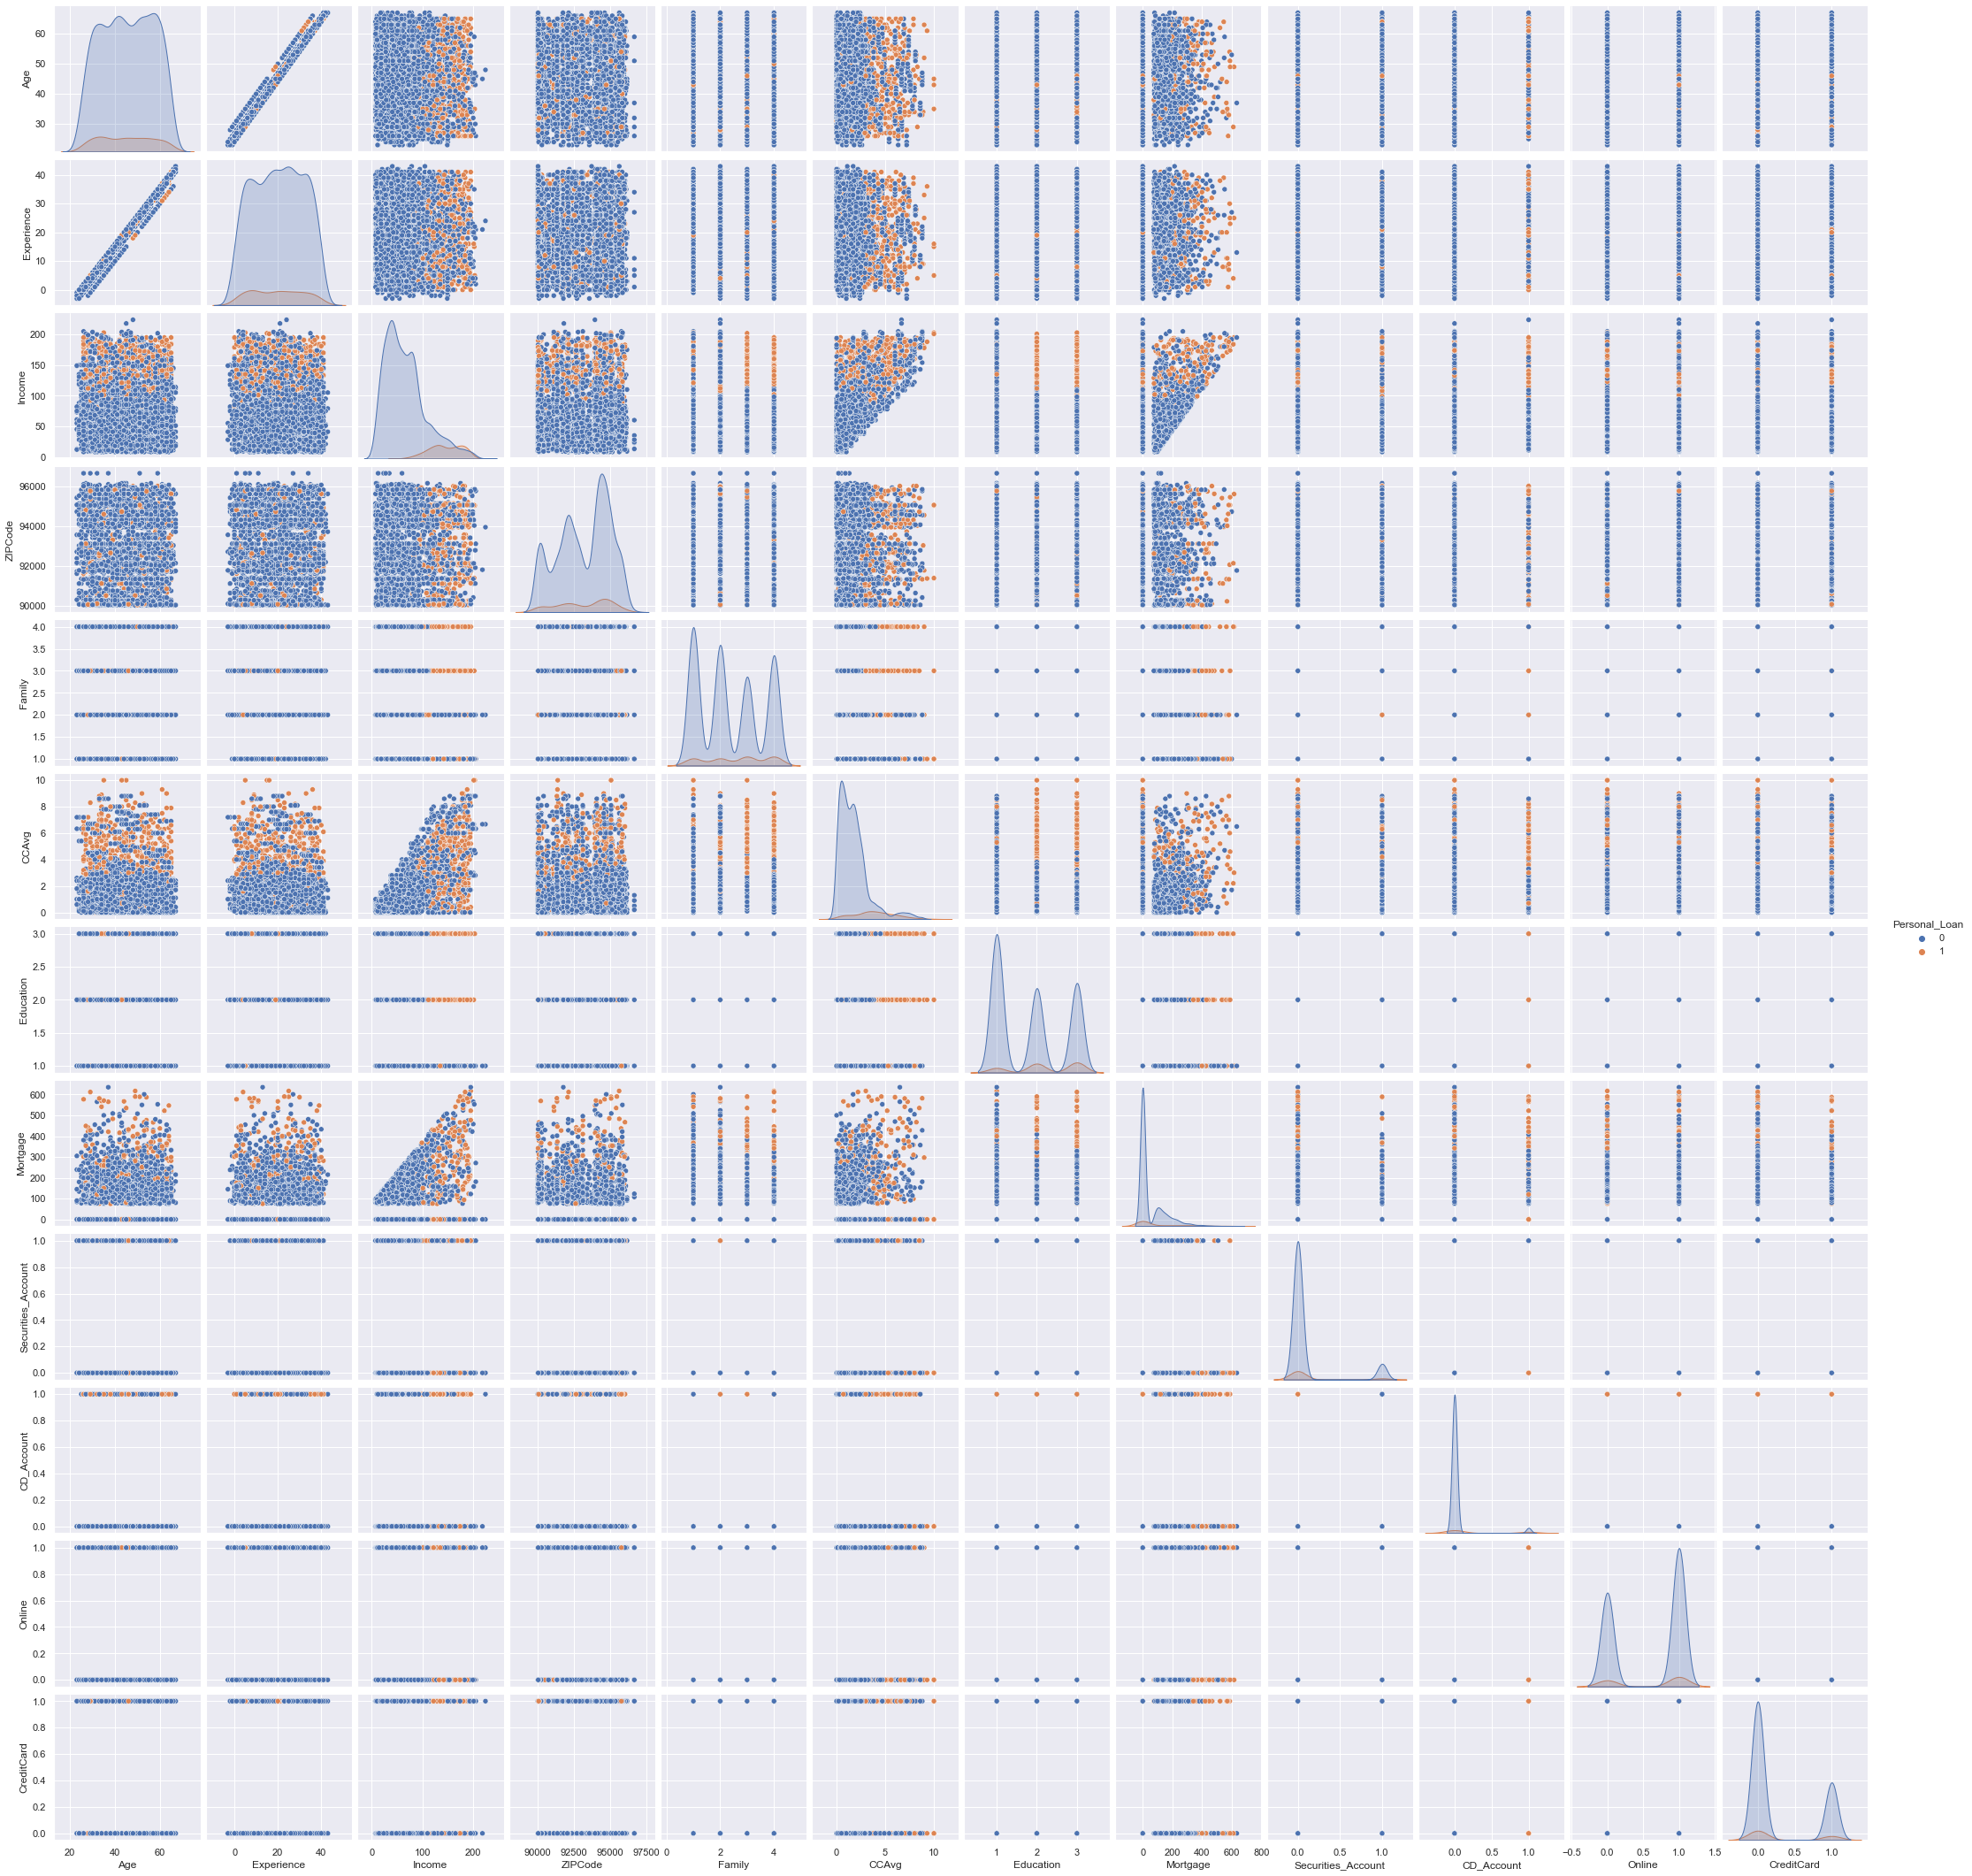

<IPython.core.display.Javascript object>

In [41]:
# Compare each numerical feature against each other
sns.pairplot(loan_data, hue="Personal_Loan")

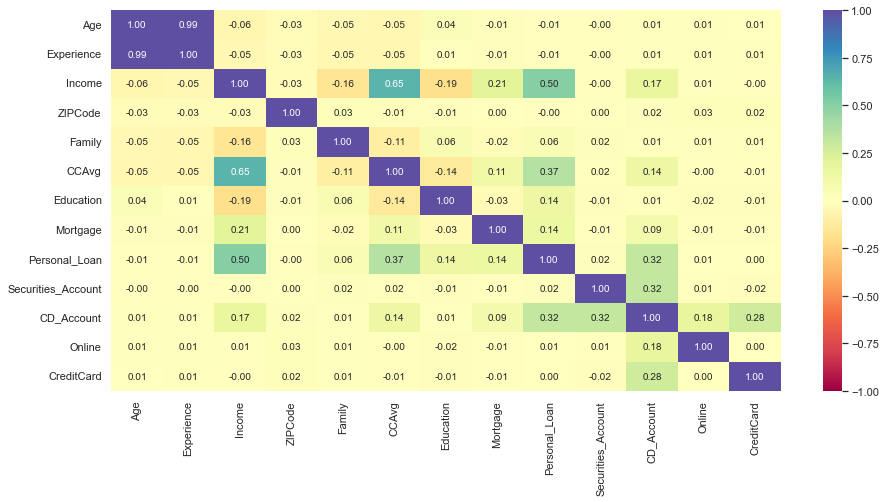

<IPython.core.display.Javascript object>

In [42]:
# Check heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(loan_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation  on correlation between multiple variables:

1. There are higher positive correlation between below features:

    a) Age and Experience
    
    b) Income and CCAvg(Average spending on Credit Card)
    
    c) **Income and Personal_Loan(Target Variable)**
    
    d) Income and Mortgage
    
    e) Income and CD_Account(Certificate of deposit (CD) account with the bank)
    
    f) **CCAvg and Personal_Loan(Target Variable)**
    
    g) CCAvg and CD_Account
    
    h) **Education and Personal_Loan(Target Variable)**
    
    i) **Mortgage and Personal_Loan(Target Variable)**
    
    j) **CD_Account and Personal_Loan(Target Variable)**
    
    k) Securities_Account and CD_Account
    
    l) CD_Account and CreditCard
    
    m) CD_Account and Online
    

2. There are higher negative correlation between below features:

    a) Income and Education
    
    b) Income and Family
    
    c) Family and CCAvg 
    
    d) CCAvg and Education



In [43]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [44]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

##### Age vs Personal Loan

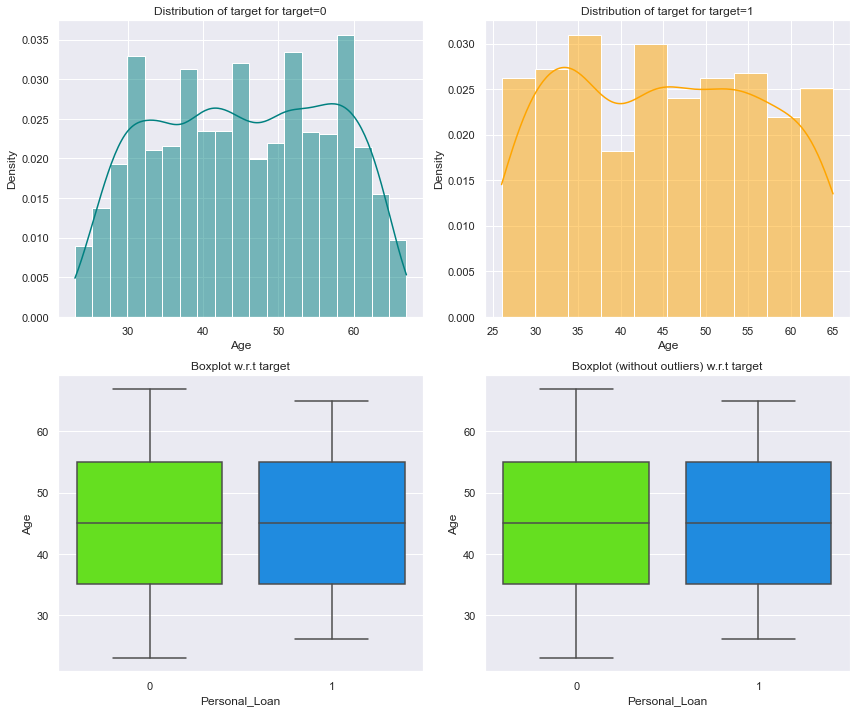

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(data=loan_data, predictor="Age", target="Personal_Loan")

#### Observation  "Age vs Personal Loan": 

1. Age has normal distribution for both Personal Loan = 'False' and Personal Loan = 'True' conditions.
2. Histogram shows customers who accepted Personal Loan are more at age 25 and 65. However, customers who didn't accept Personal Loan are less at age 25 and 65.
3. Box plots shows customers who accepted and not accepted personal loan fall in same age range.
4. There is no high correlation between Age and Personal Loan. 

##### Experience vs Personal Loan

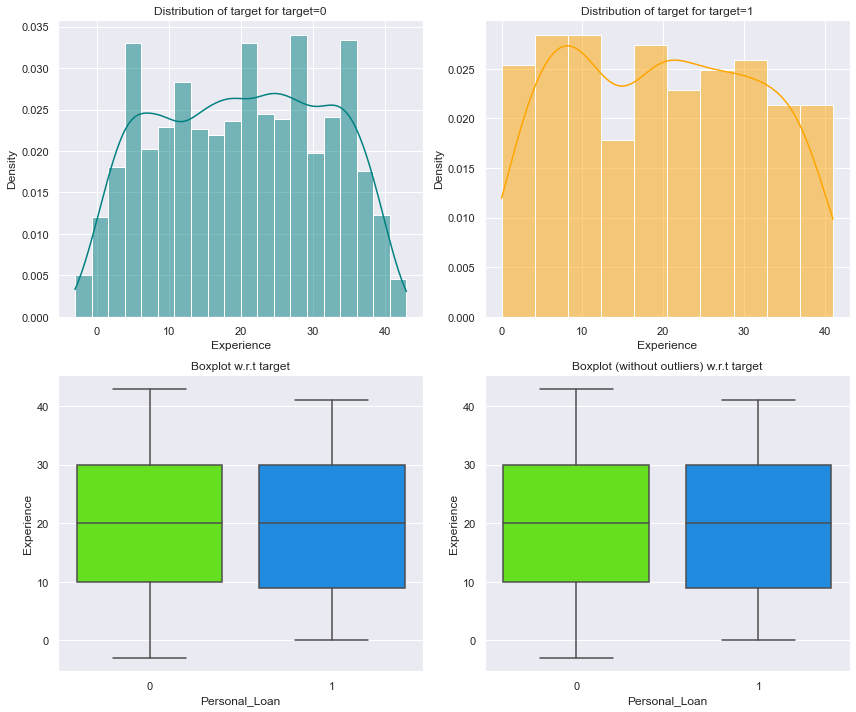

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(
    data=loan_data, predictor="Experience", target="Personal_Loan"
)

#### Observation  "Experience vs Personal Loan": 

1. Experience has normal distribution for both Personal Loan = 'False' and Personal Loan = 'True' conditions.
2. Histogram shows customers with Experience 0 and 40 accepted Personal Loan little more.
3. Box plots shows customers who accepted and not accepted personal loan fall in same Experience range.
4. There is no high correlation between Age and Personal Loan. 

##### Income vs Personal Loan

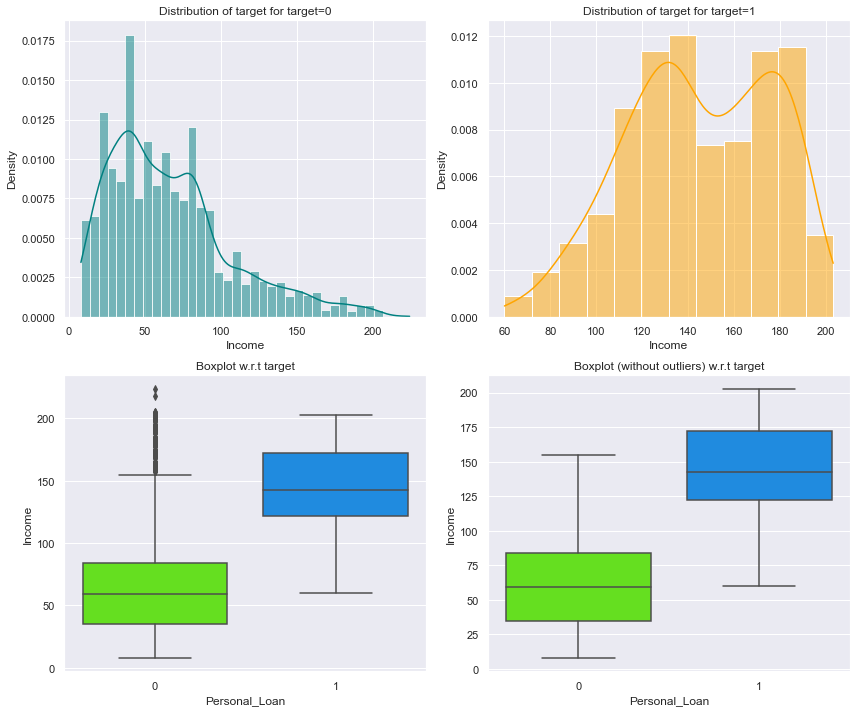

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data=loan_data, predictor="Income", target="Personal_Loan")

#### Observation  "Income vs Personal Loan": 

1. Income is highly right skewed for Personal Loan = 'False' and left skewed for Personal Loan = 'True'. 
2. Both Histogram and Box Plots shows mostly customers with **high income** accepted Personal Loan. Also, mostly customers with **low income** didnt accept Personal Loan
2. **There is high positive correlation between Income and Personal Loan.** Customers with higher income has more chance to accept Personal Loan. Probably because they are confident to re-pay loan with their income. Also, banks sometimes checks Income to issue Personal Loan

#### D. ZIPCode vs Personal Loan

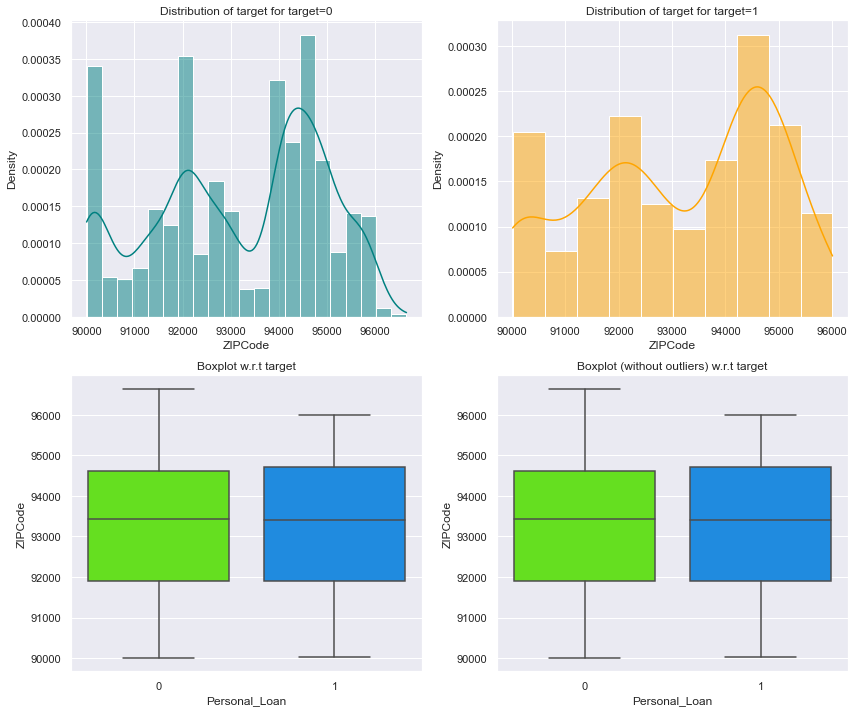

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(
    data=loan_data, predictor="ZIPCode", target="Personal_Loan"
)

#### Observation  "ZIPCode vs Personal Loan": 

1. ZIPCode has normal distribution for both Personal Loan = 'False' and Personal Loan = 'True' conditions.
2. There is no high correlation between ZIPCode and Personal Loan. 

##### Family vs Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
----------------------------------------------------------------------------------------------------


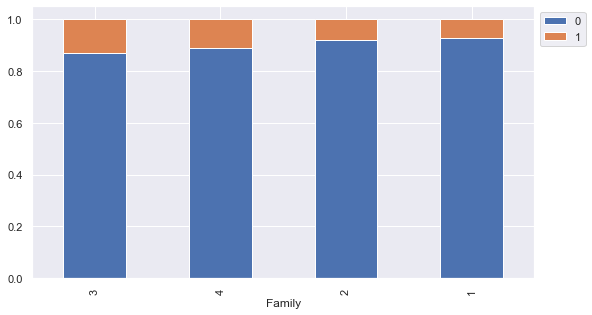

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data=loan_data, predictor="Family", target="Personal_Loan")

#### Observation  "Family vs Personal Loan": 

1. Customers with Family of 3 has mostly accepted Personal Loan. Then comes Family of 4,2 and 1.
2. There is no high correlation between Family and Personal Loan. 

##### CCAvg vs Personal Loan

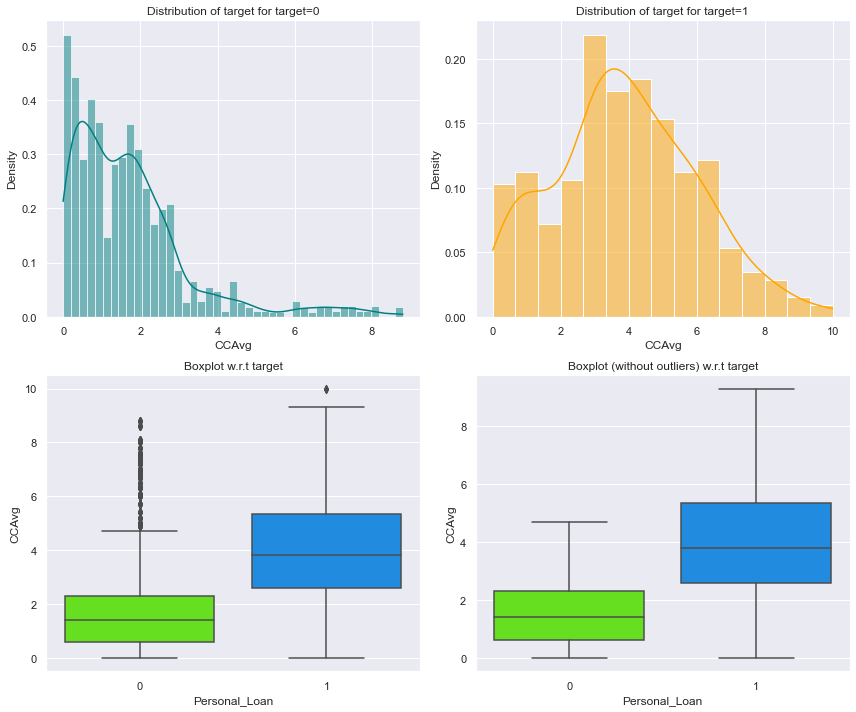

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(data=loan_data, predictor="CCAvg", target="Personal_Loan")

#### Observation  "CCAvg vs Personal Loan": 

1. CCAvg is highly right skewed for Personal Loan = 'False' and normally distributed for Personal Loan = 'True'. 
2. Both Histogram and Box Plots shows mostly customers with **low CCAvg** did not accept Personal Loan. However,  customers who accepted Personal Loan is normally distributed.
2. **There is high positive correlation between Income and CCAvg Loan.** Customers with lower CCAvg mostly dont accept Personal Loan. Probably they are not spending much money and their expenses are very low. So they dont need a Personal Loan. However, customers with high CCAvg accepts Personal Loan because their expenses are more and they spend more money in purchases. They may also want to pay off CCAvg balances with Personal Loan.

##### Education vs Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
----------------------------------------------------------------------------------------------------


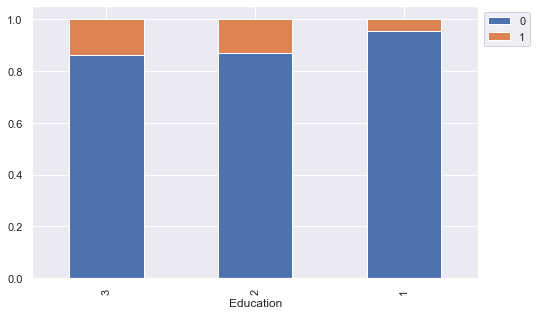

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data=loan_data, predictor="Education", target="Personal_Loan")

#### Observation  "Education vs Personal Loan": 

1. Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
2. Customers with higher Education of "Advanced/Professional" tend to accept Personal Loan more. Then comes "Graduate" and "Undergrad".
2. **There is positive correlation between Education and Personal Loan.**

##### Mortgage vs Personal Loan

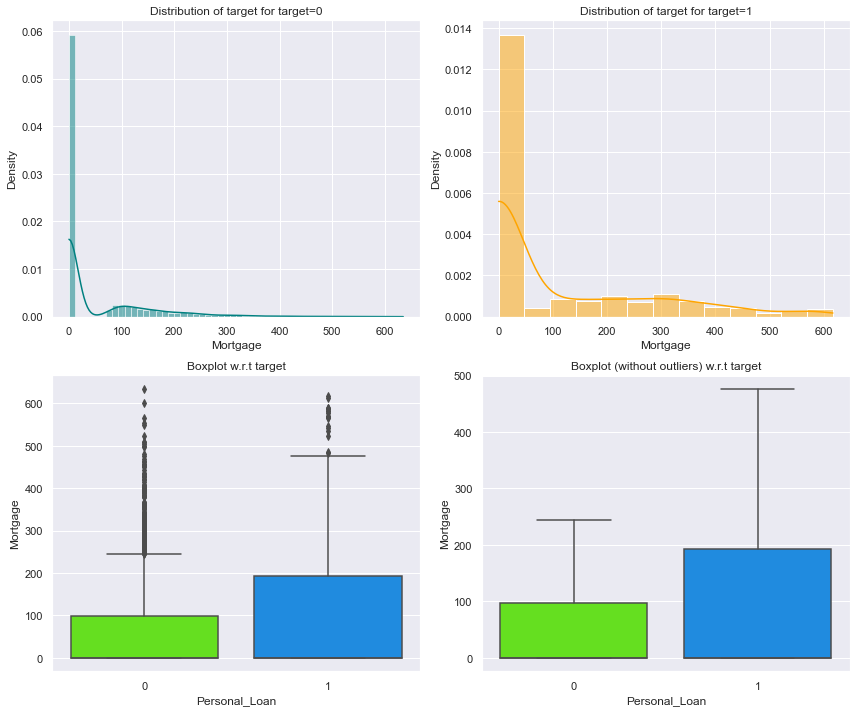

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(
    data=loan_data, predictor="Mortgage", target="Personal_Loan"
)

#### Observation  "Mortgage vs Personal Loan": 

1. Mortgage is highly right skewed for Personal Loan = 'False' and slightly right skewed for Personal Loan = 'True'.
2. Most of the customers haven't taken any mortgages.
2. Both Histogram and Box Plots shows mostly customers with **low or no Mortgage** did not accept Personal Loan. 
3. **There is high positive correlation between Mortgage and CCAvg Loan.** Customers with lower Mortgage mostly dont accept Personal Loan. Probably they have enough money because they are not paying any mortgages.

##### Securities_Account vs Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
----------------------------------------------------------------------------------------------------


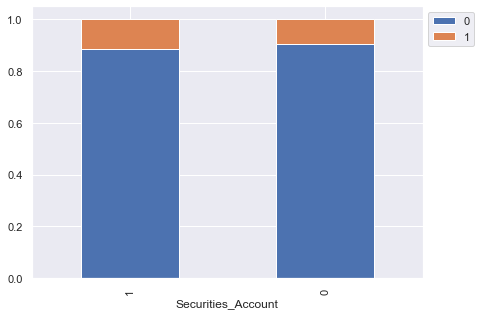

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data=loan_data, predictor="Securities_Account", target="Personal_Loan")

#### Observation  "Securities_Account vs Personal Loan": 

1. Customers with Securities_Accounut tend to accept Personal Loan slightly.
2. There is no high correlation between Securities_Accounut and Personal Loan.

##### CD_Account vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
----------------------------------------------------------------------------------------------------


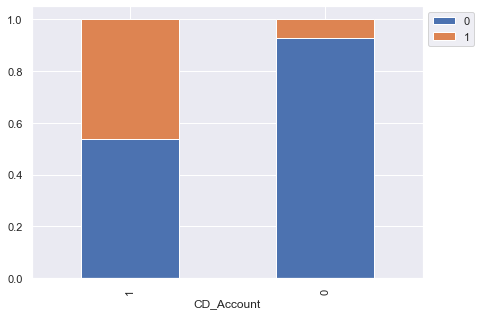

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data=loan_data, predictor="CD_Account", target="Personal_Loan")

#### Observation  "CD_Account vs Personal Loan": 

1. Customers with CD_Account tend to accept Personal Loan more. Probably they have more income and are confident to pay back Personal Loan.
2. **There is positive correlation between CD_Account and Personal Loan.**

##### Online vs Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
----------------------------------------------------------------------------------------------------


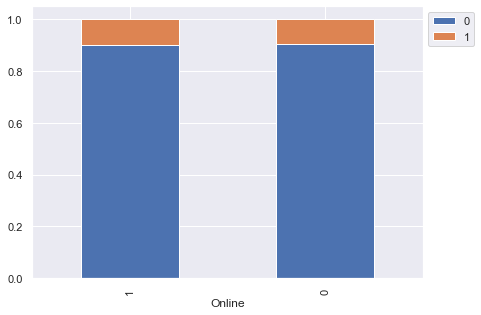

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data=loan_data, predictor="Online", target="Personal_Loan")

#### Observation  "Online vs Personal Loan": 

1. Customers with Online banking tend to accept Personal Loan slightly.
2. There is no high correlation between Online and Personal Loan.

##### CreditCard vs Personal Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
----------------------------------------------------------------------------------------------------


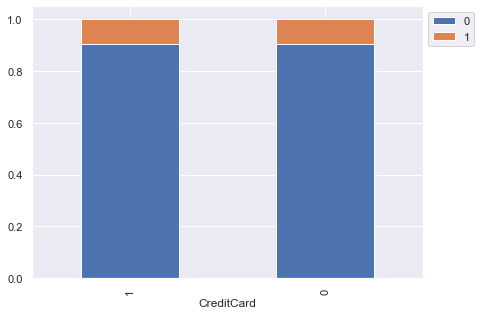

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(data=loan_data, predictor="CreditCard", target="Personal_Loan")

#### Observation  "CreditCard vs Personal Loan": 

1. Customers with CreditCard tend to accept Personal Loan slightly.
2. There is no high correlation between CreditCard and Personal Loan.

##### Income vs CCAvg

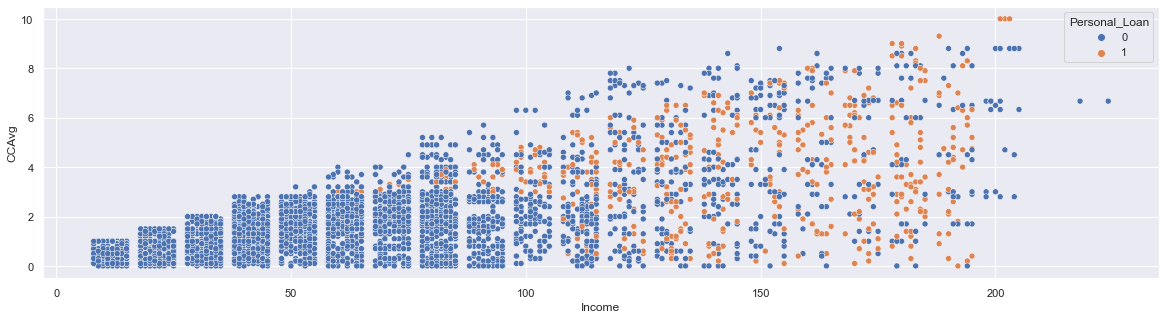

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Income", y="CCAvg", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Income vs CCAvg": 

1. CCAvg (Credit Card Average Spending) increases as Income increases
2. Customers with higher Income and CCAvg tend to accept Personal Loan

##### Income vs Mortgage

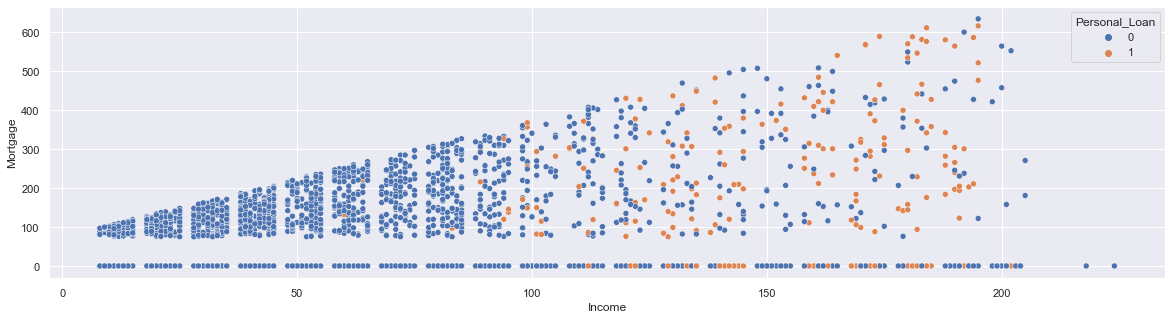

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Income", y="Mortgage", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Income vs Mortgage": 

1. Mortgage increases as Income increases
2. Customers with higher Income and Mortgage tend to accept Personal Loan

##### CD Account vs Income

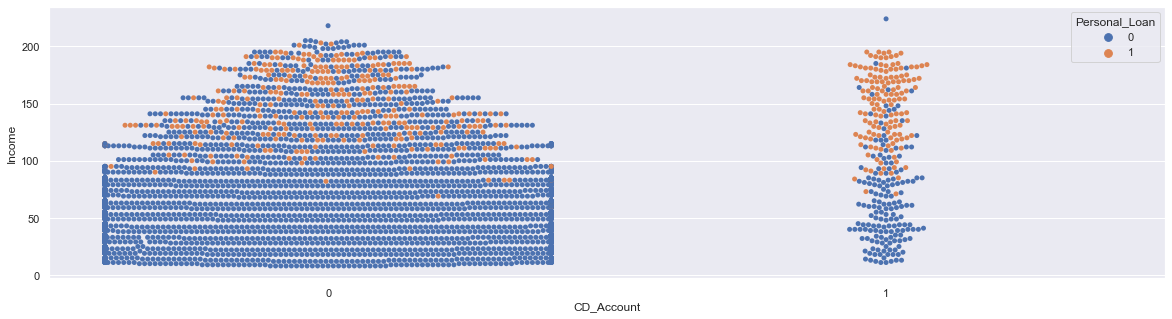

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="CD_Account", y="Income", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "CD_Account vs Income": 

1. Most of customers with lower income do not have CD Account (certificate of deposit (CD) account with the bank)
2. Customers with higher Income and have CD Account tend to accept Personal Loan

##### CD Account vs CCAvg

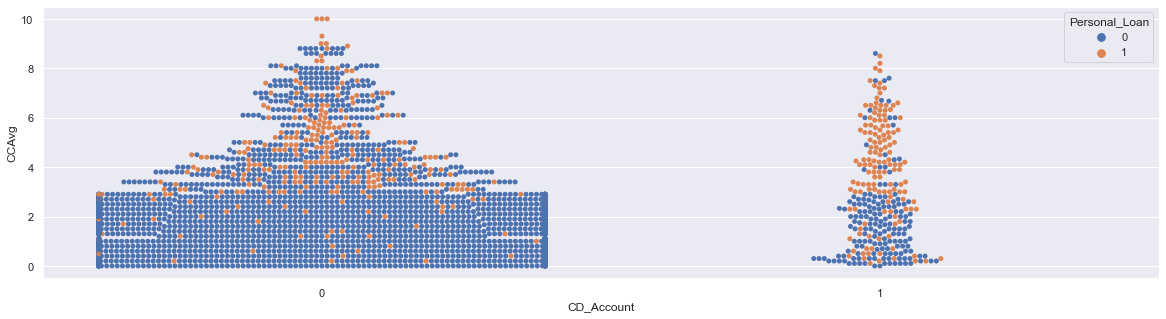

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="CD_Account", y="CCAvg", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "CD_Account vs CCAvg": 

1. Most of customers with lower CCAvg (Average spending on credit cards per month) do not have CD Account (certificate of deposit (CD) account with the bank)
2. Customers with higher CCAvg and have CD Account tend to accept Personal Loan

##### Education vs Income

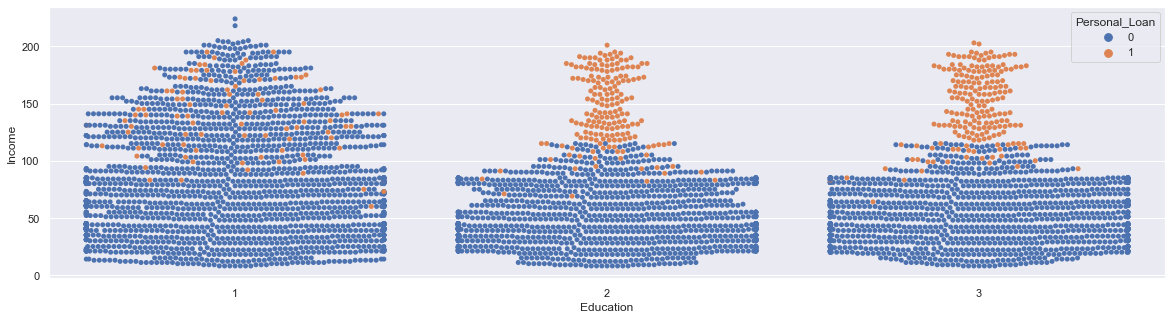

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="Education", y="Income", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Education vs Income": 

1. Most of the customers with lower Education (Undergrad) have higher Income
2. Customers with higher Education (both Graduate & Advanced/Professional) and higher income tend to accept Personal Loan

##### Family vs Income

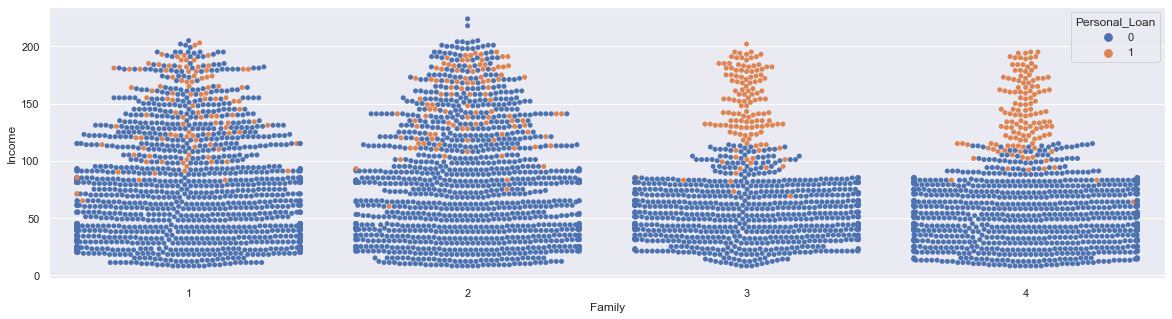

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="Family", y="Income", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Family vs Income": 

1. Most of the customers with lower Family size have higher Income
2. Customers with higher Family size and higher income tend to accept Personal Loan

##### Family vs CCAvg

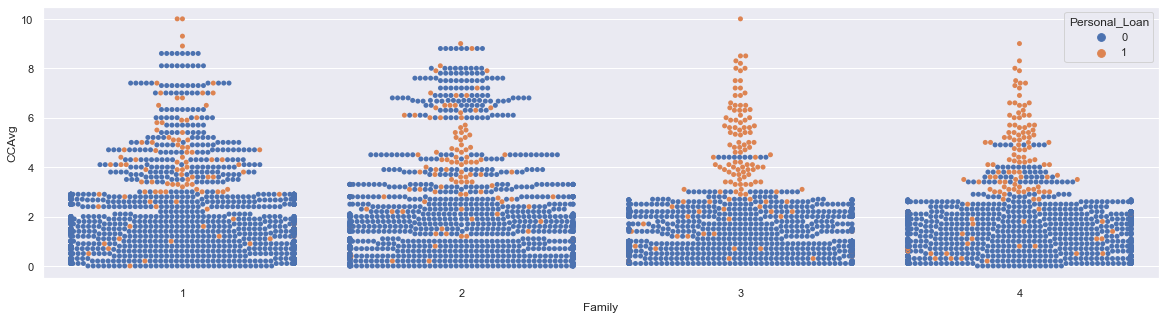

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="Family", y="CCAvg", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Family vs CCAvg": 

1. Most of the customers with lower Family size have higher CCAvg (Average spending on credit cards per month)
2. Customers with higher Family size and higher CCAvg tend to accept Personal Loan

##### Education vs CCAvg

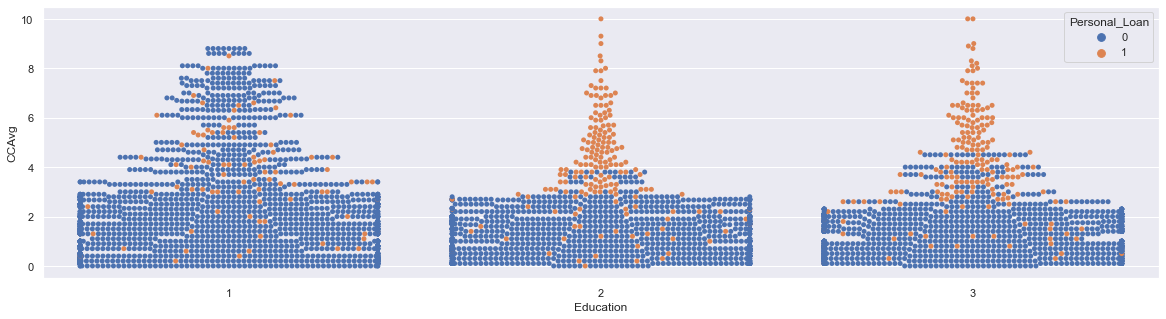

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(20, 5))
sns.swarmplot(x="Education", y="CCAvg", data=loan_data, hue="Personal_Loan")
plt.show()

#### Observation  "Education vs CCAvg": 

1. Most of the customers with lower Education (Undergrad) have higher CCAvg (Average spending on credit cards per month)
2. Customers with higher Education (both Graduate & Advanced/Professional) and higher CCAvg tend to accept Personal Loan

### 5. Insights Based On EDA

### Data Description:

* There are 5000 rows and 13 columns
* There are no null values. So missing value treatment is not required
* All columns are numerical
* Target variable is the Personal Loan which is a number, but, its a categorical data type.
* Columns "Age" and "Experience" are in years and are continous numerical variable.
* Columns "Income", "CCAvg" and "Mortgage" are in thousand dollars and are continous numerical variable.
* Columns "ZIP Code", "Family", "Education", "Securities_Account", "CD_Account", "Online" and "Credit Card" seems to be categorical variables even though values are numerical.

### Data Cleaning:

* There are no null values for Missing Value Treatment
* The column Education can be converted to categorical variable. Its values are categorized as 1: Undergrad; 2: Graduate;3: Advanced/Professional
* The column ZIPCode is a categorical variable even though its numerical. It has to be converted into more simplified County for better prediction
* Most of values in column Mortgage are zero. So its better to classify whether customer has taken Mortgage or not


### Insights on each columns are listed below:


**1. ID (Customer ID) :** This column was unique. So made this index column.

**2. Age (Customer’s age in completed years) :** Age has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 45.338400 and 45 respectively.

**3. Experience (#years of professional experience) :** Experience has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 20.104600 and 20 respectively.

**4. Income (Annual income of the customer (in thousand dollars)) :** Income has rightly skewed distribution without outliers. **So outlier treatment is required**. Mean and Median are not same with values as 73.774200 and 64 respectively.

**5. ZIP Code (Home Address ZIP code) :** ZIPCode is a number. But, its not a continous numerical variable. It should be a categorical variable representing a location/area in USA. So feature engineering will be required before model building

**6. Family (the Family size of the customer) :** Family is a number which are in sequential order. The unique values are less. But, since values are in sequential order, it can be a numerical variable. **Most of customers have Family size 1.**

**7. CCAvg (Average spending on credit cards per month (in thousand dollars)) :** CCAvg has rightly skewed distribution with outliers. **So outlier treatment is required**. Mean and Median are not same with values as 1.937938 and 1.5 respectively.

**8. Education (Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional) :** Education is a number. Data dictionary says Education is categorized. So need to update categorical values into column "Education". **Most of customers are "Undergrad".**

**9. Mortgage (Value of house mortgage if any. (in thousand dollars)) :** Mortgage has heavily rightly skewed distribution with outliers. Mean and Median are not same with values as 56.498800  and 0 respectively. Standard deviation is very high at 101.713802. Almost 3500 rows from total 5000 rows are zero values. It may be genuine because customers may not have taken mortgage. So this data can be classified as whether mortgage was taken or not.

**10. Personal_Loan (Did this customer accept the personal loan offered in the last campaign?) :** Personal_Loan is the target variable. It is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It denotes whether customer accepted Personal Loan or not. It can be converted into categorical column. Its fine because both Logistic Regression and Decision Tree algorithm can predict categorical variables. **Most of customers did not accept Personal Loan in last campaign. Target is to get more customers to accept Personal Loan.**

**11. Securities_Account (Does the customer have securities account with the bank?) :** Securities_Account is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not have Securities Account.**

**12. CD_Account (Does the customer have a certificate of deposit (CD) account with the bank?) :** CD_Account is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not have CD Account.**

**13. Online (Do customers use internet banking facilities?) :** Online is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do use Online banking.**

**14. CreditCard (Does the customer use a credit card issued by any other Bank (excluding All life Bank)?) :** CreditCard is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not use CreditCard.**


### Other Insights :

**1. Income vs Personal Loan:** There is high positive correlation between Income and Personal Loan. Customers with higher income has more chance to accept Personal Loan. Probably because they are confident to re-pay loan with their income. Also, banks sometimes checks Income to issue Personal Loan.

**2. CCAvg vs Personal Loan:** There is high positive correlation between Income and CCAvg Loan. Customers with lower CCAvg mostly dont accept Personal Loan. Probably they are not spending much money and their expenses are very low. So they dont need a Personal Loan. However, customers with high CCAvg accepts Personal Loan because their expenses are more and they spend more money in purchases. They may also want to pay off CCAvg balances with Personal Loan.

**3. Education vs Personal Loan:** There is positive correlation between Education and Personal Loan. Customers with higher Education of "Advanced/Professional" tend to accept Personal Loan more. Then comes "Graduate" and "Undergrad".

**4. Mortgage vs Personal Loan:** There is high positive correlation between Mortgage and CCAvg Loan. Customers with lower Mortgage mostly dont accept Personal Loan. Probably they have enough money because they are not paying any mortgages.

**5. CD_Account vs Personal Loan:** There is positive correlation between CD_Account and Personal Loan. Customers with CD_Account tend to accept Personal Loan more. Probably they have more income and are confident to pay back Personal Loan.

**6. Income vs CCAvg:** CCAvg (Credit Card Average Spending) increases as Income increases. Customers with higher Income and CCAvg tend to accept Personal Loan.

**7. Income vs Mortgage:** Mortgage increases as Income increases. Customers with higher Income and Mortgage tend to accept Personal Loan.

**8. CD_Account vs Income:** Most of customers with lower income do not have CD Account (certificate of deposit (CD) account with the bank). Customers with higher Income and have CD Account tend to accept Personal Loan.

**9. CD_Account vs CCAvg:** Most of customers with lower CCAvg (Average spending on credit cards per month) do not have CD Account (certificate of deposit (CD) account with the bank). Customers with higher CCAvg and have CD Account tend to accept Personal Loan.

**10. Education vs Income:** Most of the customers with lower Education (Undergrad) have higher Income. Customers with higher Education (both Graduate & Advanced/Professional) and higher income tend to accept Personal Loan.

**11. Family vs Income:** Most of the customers with lower Family size have higher Income. Customers with higher Family size and higher income tend to accept Personal Loan.

**12. Family vs CCAvg:** Most of the customers with lower Family size have higher CCAvg (Average spending on credit cards per month). Customers with higher Family size and higher CCAvg tend to accept Personal Loan.

**13. Education vs CCAvg:** Most of the customers with lower Education (Undergrad) have higher CCAvg (Average spending on credit cards per month). Customers with higher Education (both Graduate & Advanced/Professional) and higher CCAvg tend to accept Personal Loan



### Actions for Data Preprocessing:

* There are no null values for Missing Value Treatment
* The column Education can be converted to categorical variable. Its values are categorized as 1: Undergrad; 2: Graduate;3: Advanced/Professional
* The column ZIPCode is a categorical variable even though its numerical. It has to be converted into more simplified County for better prediction
* Most of values in column Mortgage are zero. So its better to classify whether customer has taken Mortgage or not


### 6. Data Preprocessing

#### A. Check Duplicates & Clean-up

In [65]:
# Check for duplicate rows
loan_data[loan_data.duplicated()]

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no duplicate values

#### B. Missing Value Treatment

In [66]:
# Check null values and its percentage

def check_null_values():
    return pd.DataFrame(
    {
        "Null values": loan_data.isnull().sum(),
        "Percentage of Null values": round(
            (loan_data.isnull().sum() / loan_data.shape[0] * 100), 2
        ),
        "Data Type": loan_data.dtypes,
    }
    )
    
    
check_null_values()



Null values  Percentage of Null values Data Type
Age                           0                        0.0     int64
Experience                    0                        0.0     int64
Income                        0                        0.0     int64
ZIPCode                       0                        0.0     int64
Family                        0                        0.0     int64
CCAvg                         0                        0.0   float64
Education                     0                        0.0     int64
Mortgage                      0                        0.0     int64
Personal_Loan                 0                        0.0     int64
Securities_Account            0                        0.0     int64
CD_Account                    0                        0.0     int64
Online                        0                        0.0     int64
CreditCard                    0                        0.0     int64

<IPython.core.display.Javascript object>

#### Observation : 
1. There are no null values
2. There may be zero values. Since columns are numerical type, zero values can be expected. To be explored further.

#### C. Feature Engineering

In [67]:
# Check data for any feature engineering
loan_data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4    1.6          1         0   
2    45          19      34    90089       3    1.5          1         0   
3    39          15      11    94720       1    1.0          1         0   
4    35           9     100    94112       1    2.7          2         0   
5    35           8      45    91330       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

<IPython.core.display.Javascript object>

In [68]:
loan_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

**Convert "Education" to categorical variables**

In [69]:
# Update categorical values in column "Education"
# Data dictionary says Education is categorized as 1: Undergrad; 2: Graduate;3: Advanced/Professional
loan_data.loc[loan_data["Education"] == 1, "Education"] = "Undergrad"
loan_data.loc[loan_data["Education"] == 2, "Education"] = "Graduate"
loan_data.loc[loan_data["Education"] == 3, "Education"] = "Advanced/Professional"

<IPython.core.display.Javascript object>

In [70]:
# Convert columns as "category"
# loan_data["Education"] = loan_data["Education"].astype("category")

<IPython.core.display.Javascript object>

**Group "ZIPCode" as County values**

In [71]:
# Create function to return County value of ZIPCode
search = SearchEngine()


def get_zipcode_county(input_value):
    """This function takes in a string from columns 'ZIPCode' and returns County"""

    zipcode = search.by_zipcode(input_value)
    if zipcode.county is None:
        county = "Unknown"
    else:
        county = zipcode.county
    return county

<IPython.core.display.Javascript object>

In [72]:
# Create new column "ZIPCode_County" from value in column "ZIPCode"
loan_data["ZIPCode_County"] = loan_data.apply(
    lambda x: get_zipcode_county(x["ZIPCode"]), axis=1
)

<IPython.core.display.Javascript object>

In [73]:
# Drop column "ZIPCode" because new column with counties are generated
loan_data.drop(["ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [74]:
# Check sample
loan_data.sample(5)

Age  Experience  Income  Family  CCAvg              Education  Mortgage  \
ID                                                                              
4581   50          24     102       2    6.3              Undergrad         0   
723    45          21     132       3    1.2               Graduate         0   
533    62          37      39       2    2.8              Undergrad       113   
852    41          16      23       2    1.4               Graduate         0   
1532   39          13      25       4    1.5  Advanced/Professional         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                        
4581              0                   0           0       1           0   
723               1                   0           1       1           1   
533               0                   0           1       1           1   
852               0                   1           0       1           0   
1532              0                   0           0       1           0   

           ZIPCode_County  
ID                         
4581   Los Angeles County  
723    Los Angeles County  
533    Santa Clara County  
852   Contra Costa County  
1532   Los Angeles County

<IPython.core.display.Javascript object>

**Convert "Mortgage" as categorical values**

Almost 3500 rows from total 5000 rows are zero values. It may be genuine because customers may not have taken mortgage. So this data can be classified as whether mortgage was taken or not

In [75]:
loan_data["Mortgage_Taken"] = loan_data["Mortgage"].apply(lambda x: 0 if x == 0 else 1)

<IPython.core.display.Javascript object>

In [76]:
# Drop column "Mortgage" because new column with boolean values are generated
loan_data.drop(["Mortgage"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [77]:
# Check for unique values in every column to decide whether to convert column as "Category"
for colname in loan_data.columns:

    # if loan_data[colname].nunique() <= 300:
    print("Column Name : ", colname)
    print("Column DataType : ", loan_data[colname].dtype)
    print("Number of unique values : ", loan_data[colname].nunique())
    print("Unique values are : ", loan_data[colname].unique())
    print("*" * 50)
    print("\n\n")

Column Name :  Age
Column DataType :  int64
Number of unique values :  45
Unique values are :  [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
**************************************************



Column Name :  Experience
Column DataType :  int64
Number of unique values :  47
Unique values are :  [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
**************************************************



Column Name :  Income
Column DataType :  int64
Number of unique values :  162
Unique values are :  [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 1

<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard",  "ZIPCode_County" and "Mortgage_Taken" can be converted to category
2. One Hot Encoding can be applied to these categorical columns
3. Column "Personal_Loan" is a target variable. Its fine to convert this as categorical because both Logistic Regression and Decision Tree algorithm can predict categorical variables
4. Column "Experience" has negative values which looks incorrect. This must be checked further.

In [78]:
# Convert columns as "category"
loan_data["Education"] = loan_data["Education"].astype("category")
loan_data["Personal_Loan"] = loan_data["Personal_Loan"].astype("category")
loan_data["Securities_Account"] = loan_data["Securities_Account"].astype("category")
loan_data["CD_Account"] = loan_data["CD_Account"].astype("category")
loan_data["Online"] = loan_data["Online"].astype("category")
loan_data["CreditCard"] = loan_data["CreditCard"].astype("category")
loan_data["ZIPCode_County"] = loan_data["ZIPCode_County"].astype("category")
loan_data["Mortgage_Taken"] = loan_data["Mortgage_Taken"].astype("category")

<IPython.core.display.Javascript object>

In [79]:
# Checking data where "Experience" has negative values
loan_data[loan_data["Experience"] < 0].sample(5)

Age  Experience  Income  Family  CCAvg              Education  \
ID                                                                    
2467   24          -2      80       2    1.6  Advanced/Professional   
577    25          -1      48       3    0.3  Advanced/Professional   
2103   25          -1      81       2    1.6  Advanced/Professional   
794    24          -2     150       2    2.0              Undergrad   
3158   23          -1      13       4    1.0              Undergrad   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
ID                                                                   
2467             0                  0          0      1          0   
577              0                  0          0      0          1   
2103             0                  0          0      1          1   
794              0                  0          0      1          0   
3158             0                  0          0      1          0   

            ZIPCode_County Mortgage_Taken  
ID                                         
2467  San Francisco County              0  
577          Orange County              0  
2103         Orange County              0  
794         Alameda County              0  
3158        Alameda County              1

<IPython.core.display.Javascript object>

#### Observation : 
1. This could be a data entry error. So converting negative numbers to its absolute values may be good idea

In [80]:
# Convert negative values in column "Experience" to its absolute values
loan_data["Experience"] = loan_data["Experience"].apply(
    lambda x: abs(x) if x < 0 else x
)

<IPython.core.display.Javascript object>

#### D. Outlier Treatment

In [81]:
# Create function to detect outliers


def detect_outliers_iqr(data):
    """
    To deteck outliers

    data: dataframe
    """

    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("1st Quantile : ", q1, " 3rd Quantile : ", q3, "\n")
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    print("Lower Whisker : ", lwr_bound, " Upper Whisker : ", upr_bound, "\n")
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

<IPython.core.display.Javascript object>

In [82]:
# Get numerical data columns
numerical_col = loan_data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Age', 'Experience', 'Income', 'Family', 'CCAvg']

<IPython.core.display.Javascript object>

In [83]:
# Check outlier values whether its genuine or data error
for colname in numerical_col:
    print("Column : ", colname, "\n")
    sample_outliers = detect_outliers_iqr(loan_data[colname])
    print("Outliers from IQR method: ", sample_outliers)
    print("*" * 50)
    print("\n\n")

Column :  Age 

1st Quantile :  35.0  3rd Quantile :  55.0 

Lower Whisker :  5.0  Upper Whisker :  85.0 

Outliers from IQR method:  []
**************************************************



Column :  Experience 

1st Quantile :  10.0  3rd Quantile :  30.0 

Lower Whisker :  -20.0  Upper Whisker :  60.0 

Outliers from IQR method:  []
**************************************************



Column :  Income 

1st Quantile :  39.0  3rd Quantile :  98.0 

Lower Whisker :  -49.5  Upper Whisker :  186.5 

Outliers from IQR method:  [188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 189, 189, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 192, 192, 192, 192, 192, 192, 193, 193, 193, 193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 198, 198, 198, 199, 199, 199, 200, 200, 200, 201, 201, 201, 201, 201, 202, 202, 203, 203, 204, 204, 204, 205, 205

<IPython.core.display.Javascript object>

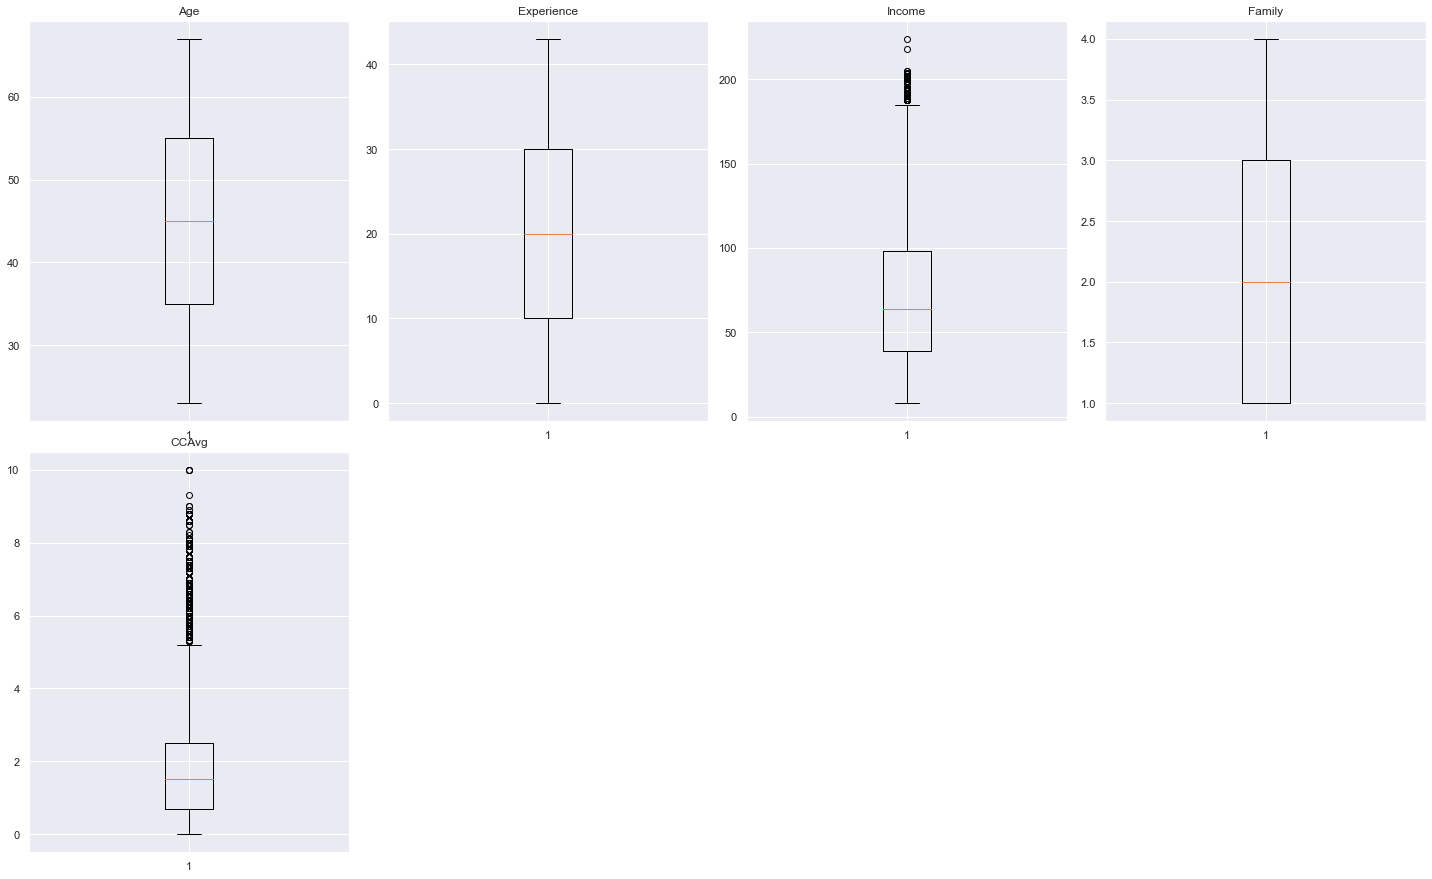

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [85]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [86]:
#numerical_col = loan_data.select_dtypes(include=np.number).columns.tolist()
loan_data = treat_outliers_all(loan_data, [
        
        "Income",
        "CCAvg",
    ])


<IPython.core.display.Javascript object>

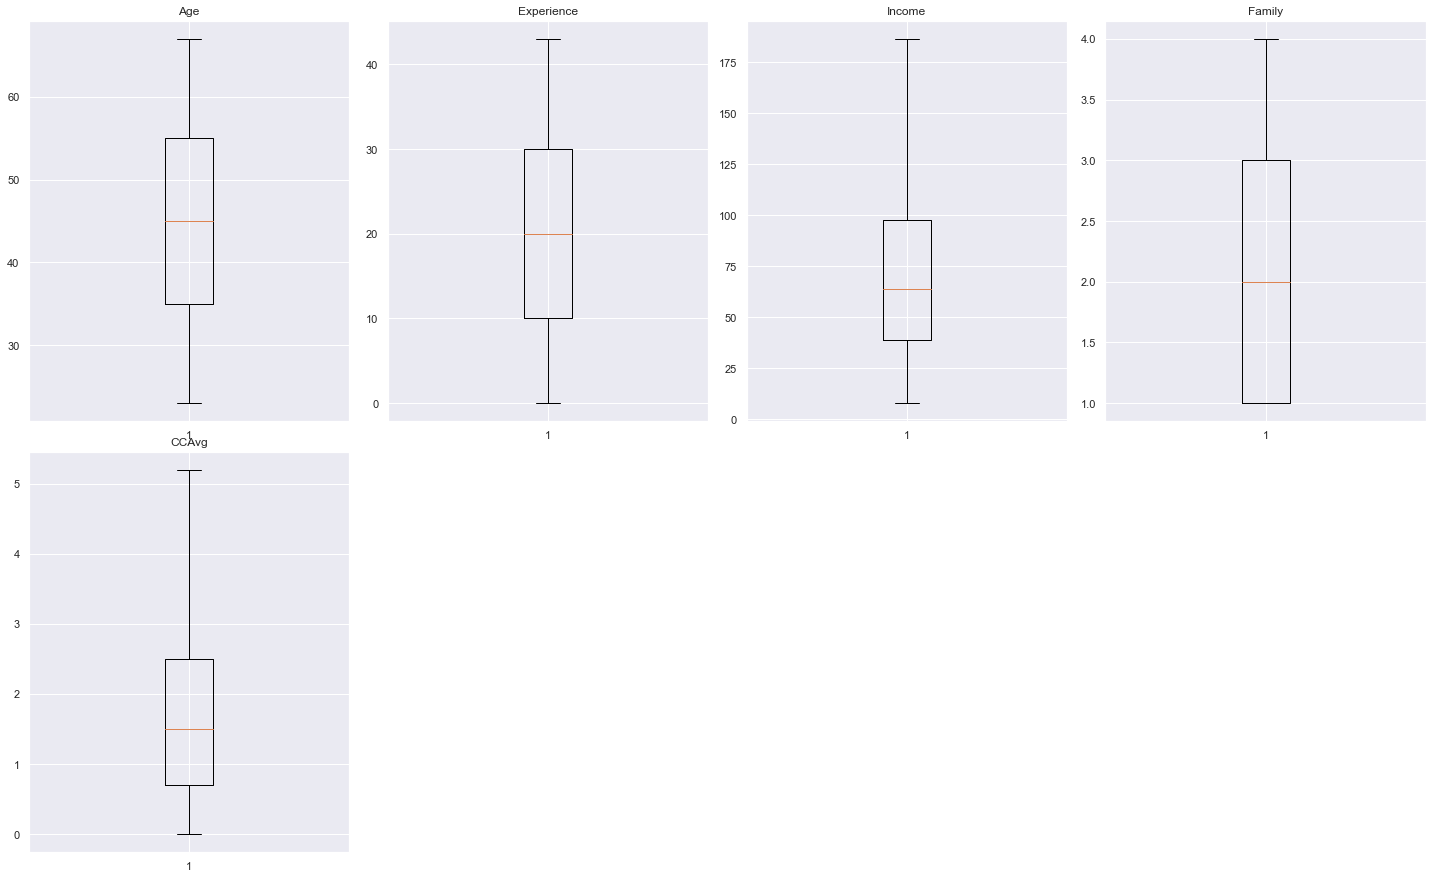

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### E. Data Preparation

In [88]:
loan_data.dtypes

Age                      int64
Experience               int64
Income                 float64
Family                   int64
CCAvg                  float64
Education             category
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
ZIPCode_County        category
Mortgage_Taken        category
dtype: object

<IPython.core.display.Javascript object>

In [89]:
# One hot encoding for dataframe with outliers
loan_data = pd.get_dummies(
    loan_data,
    columns=[
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "ZIPCode_County",
        "Mortgage_Taken",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

#### F. Data Split - Training & Test

In [90]:
# Create X and Y data for independent and dependent variables respectively
X = loan_data.drop("Personal_Loan", axis=1)
Y = loan_data["Personal_Loan"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

#### G. Data Split Check

In [91]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format(
        (len(X_train) / len(loan_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Test set".format((len(X_test) / len(loan_data.index)) * 100)
)

70.00% data is in Training set
30.00% data is in Test set


<IPython.core.display.Javascript object>

In [92]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 50)
Shape of Test set :  (1500, 50)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

In [93]:
# Check diabetes True/False ratio in split data

print(
    "Original Personal Loan Accepted Values    : {0} ({1:0.2f}%)".format(
        len(loan_data.loc[loan_data["Personal_Loan"] == 1]),
        (len(loan_data.loc[loan_data["Personal_Loan"] == 1]) / len(loan_data.index))
        * 100,
    )
)
print(
    "Original Personal Loan Not Accepted Values   : {0} ({1:0.2f}%)".format(
        len(loan_data.loc[loan_data["Personal_Loan"] == 0]),
        (len(loan_data.loc[loan_data["Personal_Loan"] == 0]) / len(loan_data.index))
        * 100,
    )
)
print("")
print(
    "Training Personal Loan Accepted Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Personal Loan Not Accepted Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Personal Loan Accepted Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Personal Loan Not Accepted Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Personal Loan Accepted Values    : 480 (9.60%)
Original Personal Loan Not Accepted Values   : 4520 (90.40%)

Training Personal Loan Accepted Values    : 331 (9.46%)
Training Personal Loan Not Accepted Values   : 3169 (90.54%)

Test Personal Loan Accepted Values        : 149 (9.93%)
Test Personal Loan Not Accepted Values       : 1351 (90.07%)



<IPython.core.display.Javascript object>

### 7. Model building - Logistic Regression

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will accept Personal Loan but in reality the customer would not accept Personal Loan. - Loss of resources

2. Predicting a customer will not accept Personal Loan but in reality the customer would have accepted Personal Loan. - Loss of opportunity

### Which case is more important? 

* If we predict a customer who was going to accept Personal Loan as a customer who will not accept Personal Loan.

### How to reduce this loss i.e need to reduce False Negatives?

*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [94]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(random_state=1, class_weight={0: 0.1, 1: 0.9})
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Coefficients

In [95]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience    Income    Family     CCAvg  \
Coefficients -0.264037    0.265201  0.050163  0.561301  0.465574   

              Education_Graduate  Education_Undergrad  Securities_Account_1  \
Coefficients           -0.145778            -2.443344              -0.55324   

              CD_Account_1  Online_1  CreditCard_1  \
Coefficients       2.46585 -0.368803     -0.772878   

              ZIPCode_County_Butte County  ZIPCode_County_Contra Costa County  \
Coefficients                    -0.070554                             0.05341   

              ZIPCode_County_El Dorado County  ZIPCode_County_Fresno County  \
Coefficients                        -0.060462                       0.00557   

              ZIPCode_County_Humboldt County  ZIPCode_County_Imperial County  \
Coefficients                       -0.096274                       -0.003844   

              ZIPCode_County_Kern County  ZIPCode_County_Lake County  \
Coefficients                    0.281041                   -0.011704   

              ZIPCode_County_Los Angeles County  ZIPCode_County_Marin County  \
Coefficients                           0.187673                     0.129742   

              ZIPCode_County_Mendocino County  ZIPCode_County_Merced County  \
Coefficients                        -0.052242                     -0.029092   

              ZIPCode_County_Monterey County  ZIPCode_County_Napa County  \
Coefficients                       -0.118029                   -0.005159   

              ZIPCode_County_Orange County  ZIPCode_County_Placer County  \
Coefficients                     -0.423891                      0.100049   

              ZIPCode_County_Riverside County  \
Coefficients                         0.610723   

              ZIPCode_County_Sacramento County  \
Coefficients                          0.196832   

              ZIPCode_County_San Benito County  \
Coefficients                         -0.050569   

              ZIPCode_County_San Bernardino County  \
Coefficients                             -0.230616   

              ZIPCode_County_San Diego County  \
Coefficients                         0.137237   

              ZIPCode_County_San Francisco County  \
Coefficients                             0.268245   

              ZIPCode_County_San Joaquin County  \
Coefficients                          -0.007988   

              ZIPCode_County_San Luis Obispo County  \
Coefficients                              -0.119743   

              ZIPCode_County_San Mateo County  \
Coefficients                        -0.600202   

              ZIPCode_County_Santa Barbara County  \
Coefficients                             0.159762   

              ZIPCode_County_Santa Clara County  \
Coefficients                           0.228841   

              ZIPCode_County_Santa Cruz County  ZIPCode_County_Shasta County  \
Coefficients                         -0.090805                     -0.042766   

              ZIPCode_County_Siskiyou County  ZIPCode_County_Solano County  \
Coefficients                       -0.014521                     -0.030175   

              ZIPCode_County_Sonoma County  ZIPCode_County_Stanislaus County  \
Coefficients                      0.065847                         -0.028612   

              ZIPCode_County_Trinity County  ZIPCode_County_Tuolumne County  \
Coefficients                      -0.023936                       -0.014098   

              ZIPCode_County_Unknown  ZIPCode_County_Ventura County  \
Coefficients                0.005806                       0.106232   

              ZIPCode_County_Yolo County  Mortgage_Taken_1  Intercept  
Coefficients                   -0.164322          0.051796  -0.515196

<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of Age, Education (Graduate & Undergrad), , Securities_Account (True), Online (True), CreditCard (True) and few ZIPCode are negative. Increase in these will lead to decrease in chances of a customer accepting Personal Loan. 


* Coefficient of Experience, Income, Family, CCAvg, CD_Account (True), few ZIPCode and Mortgage_Taken (True) are  positive. Increase in these will lead to increase in chances of a customer accepting Personal Loan.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

#### Odds from coefficients

In [96]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience    Income     Family      CCAvg  \
Odds          0.767945    1.303693  1.051443   1.752951   1.592928   
Change_odd% -23.205484   30.369289  5.144284  75.295128  59.292807   

             Education_Graduate  Education_Undergrad  Securities_Account_1  \
Odds                   0.864350             0.086870              0.575084   
Change_odd%          -13.565027           -91.313009            -42.491636   

             CD_Account_1   Online_1  CreditCard_1  \
Odds            11.773490   0.691562      0.461682   
Change_odd%   1077.349007 -30.843819    -53.831773   

             ZIPCode_County_Butte County  ZIPCode_County_Contra Costa County  \
Odds                            0.931878                            1.054862   
Change_odd%                    -6.812244                            5.486236   

             ZIPCode_County_El Dorado County  ZIPCode_County_Fresno County  \
Odds                                0.941330                      1.005585   
Change_odd%                        -5.867016                      0.558526   

             ZIPCode_County_Humboldt County  ZIPCode_County_Imperial County  \
Odds                               0.908216                        0.996163   
Change_odd%                       -9.178442                       -0.383697   

             ZIPCode_County_Kern County  ZIPCode_County_Lake County  \
Odds                           1.324507                    0.988364   
Change_odd%                   32.450738                   -1.163612   

             ZIPCode_County_Los Angeles County  ZIPCode_County_Marin County  \
Odds                                  1.206439                     1.138534   
Change_odd%                          20.643868                    13.853427   

             ZIPCode_County_Mendocino County  ZIPCode_County_Merced County  \
Odds                                0.949099                      0.971327   
Change_odd%                        -5.090116                     -2.867316   

             ZIPCode_County_Monterey County  ZIPCode_County_Napa County  \
Odds                               0.888670                    0.994855   
Change_odd%                      -11.132972                   -0.514533   

             ZIPCode_County_Orange County  ZIPCode_County_Placer County  \
Odds                             0.654495                      1.105225   
Change_odd%                    -34.550484                     10.522526   

             ZIPCode_County_Riverside County  \
Odds                                1.841762   
Change_odd%                        84.176163   

             ZIPCode_County_Sacramento County  \
Odds                                 1.217540   
Change_odd%                         21.753979   

             ZIPCode_County_San Benito County  \
Odds                                 0.950688   
Change_odd%                         -4.931188   

             ZIPCode_County_San Bernardino County  \
Odds                                     0.794044   
Change_odd%                            -20.595591   

             ZIPCode_County_San Diego County  \
Odds                                1.147100   
Change_odd%                        14.709976   

             ZIPCode_County_San Francisco County  \
Odds                                    1.307667   
Change_odd%                            30.766722   

             ZIPCode_County_San Joaquin County  \
Odds                                  0.992044   
Change_odd%                          -0.795611   

             ZIPCode_County_San Luis Obispo County  \
Odds                                      0.887148   
Change_odd%                             -11.285174   

             ZIPCode_County_San Mateo County  \
Odds                                0.548701   
Change_odd%                       -45.129906   

             ZIPCode_County_Santa Barbara County  \
Odds                                    1.173231   
Change_odd%                            17.323113   

             ZIPCode_County_Santa Clar

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer accepting Personal Loan by 0.76 times or a 23.2% decrease in odds of accepting Personal Loan.


* `Experience`: Holding all other features constant a 1 unit change in Experience will increase the odds of a customer accepting Personal Loan by 1.3 times or a 30.3% increase in odds of accepting Personal Loan.


* `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a customer accepting Personal Loan by 1.05 times or a 5.1% increase in odds of accepting Personal Loan.


* `Family`: Holding all other features constant a 1 unit change in Family will increase the odds of a customer accepting Personal Loan by 1.75 times or a 75.2% increase in odds of accepting Personal Loan.


* `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer accepting Personal Loan by 1.59 times or a 59.2% increase in odds of accepting Personal Loan.



`Interpretation for other attributes can be done similarly.`

### 8. Model Performance Evaluation and Improvement

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf



<IPython.core.display.Javascript object>

In [98]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Confusion Matrix

Confusion Matrix is performance measure of models

**True Positives (TP):** we correctly predicted that customers will accept personal loan, and they did.

**True Negatives (TN):** we correctly predicted that customers will not accept personal loan, and they did.

**False Positives (FP):** we correctly predicted that customers will accept personal loan, but, they did not (a "Type I error").

**False Negatives (FN):** we correctly predicted that customers will not accept personal loan, but, they did (a "Type II error").

#### Logistic Regression Model 1 : Checking model performance on Training set

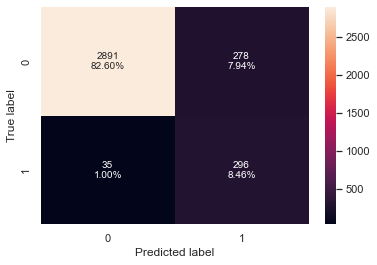

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [100]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy   Recall  Precision        F1
0  0.910571  0.89426   0.515679  0.654144

<IPython.core.display.Javascript object>

#### Logistic Regression Model 1 : Checking model performance on Test set

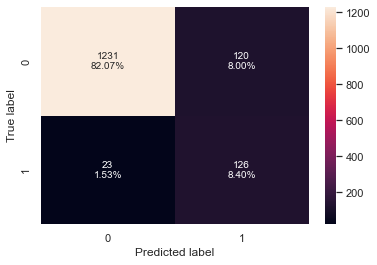

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [102]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.904667  0.845638   0.512195  0.637975

<IPython.core.display.Javascript object>

#### Comments on Model 1 performance

* Recall score is only 0.845638. Try to improve this score

#### ROC-AUC

#### ROC-AUC on training set

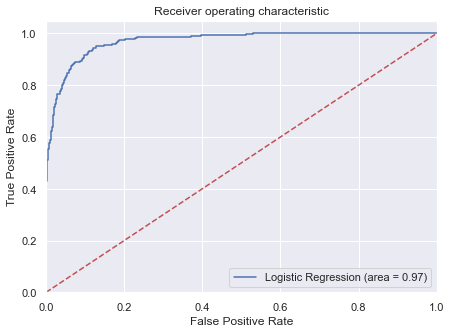

<IPython.core.display.Javascript object>

In [103]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### ROC-AUC on test set

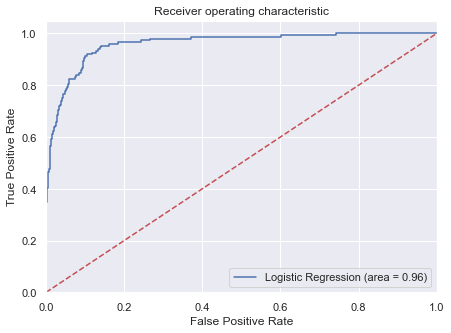

<IPython.core.display.Javascript object>

In [104]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [105]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.39336765009570374


<IPython.core.display.Javascript object>

#### Logistic Regression Model 2 : Checking model performance on Training set

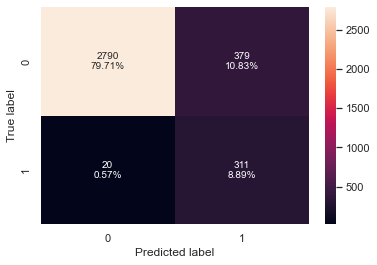

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [107]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0     0.886  0.939577   0.450725  0.609207

<IPython.core.display.Javascript object>

#### Logistic Regression Model 2 : Checking model performance on Training set

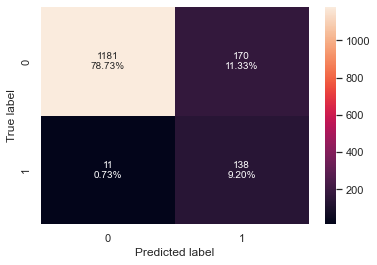

<IPython.core.display.Javascript object>

In [108]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [109]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.879333  0.926174   0.448052  0.603939

<IPython.core.display.Javascript object>

#### Comments on Model 2 performance

* Recall score has increased to 0.926174 which is good. However, lets try Precision-Recall curve to improve this score

#### Let's use Precision-Recall curve and see if we can find a better threshold

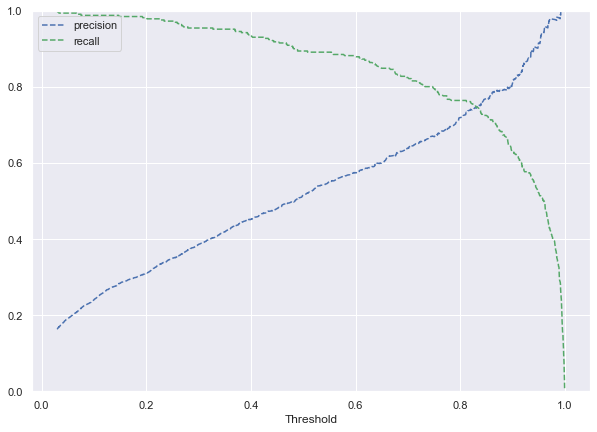

<IPython.core.display.Javascript object>

In [110]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [111]:
# setting the threshold
optimal_threshold_curve = 0.84

<IPython.core.display.Javascript object>

#### Logistic Regression Model 3 : Checking model performance on Training set

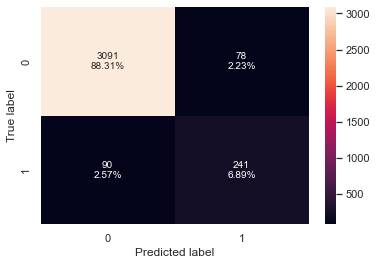

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [113]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0     0.952  0.728097   0.755486  0.741538

<IPython.core.display.Javascript object>

#### Logistic Regression Model 3 : Checking model performance on Test set

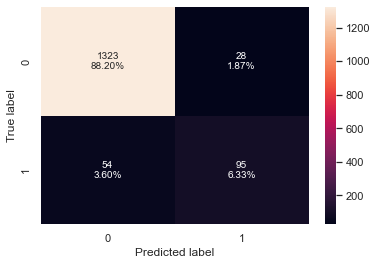

<IPython.core.display.Javascript object>

In [114]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [115]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0  0.945333  0.637584   0.772358  0.698529

<IPython.core.display.Javascript object>

#### Comments on Model 3 performance

* Recall score is reduced to 0.637584. So Model 2 performance was better.

### Model Performance Summary

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn (Model 1)",
    "Logistic Regression-0.39 Threshold (Model 2)",
    "Logistic Regression-0.84 Threshold (Model 3)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn (Model 1)  \
Accuracy                                0.910571   
Recall                                  0.894260   
Precision                               0.515679   
F1                                      0.654144   

           Logistic Regression-0.39 Threshold (Model 2)  \
Accuracy                                       0.886000   
Recall                                         0.939577   
Precision                                      0.450725   
F1                                             0.609207   

           Logistic Regression-0.84 Threshold (Model 3)  
Accuracy                                       0.952000  
Recall                                         0.728097  
Precision                                      0.755486  
F1                                             0.741538

<IPython.core.display.Javascript object>

In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn (Model 1)",
    "Logistic Regression-0.39 Threshold (Model 2)",
    "Logistic Regression-0.84 Threshold (Model 3)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn (Model 1)  \
Accuracy                                0.904667   
Recall                                  0.845638   
Precision                               0.512195   
F1                                      0.637975   

           Logistic Regression-0.39 Threshold (Model 2)  \
Accuracy                                       0.879333   
Recall                                         0.926174   
Precision                                      0.448052   
F1                                             0.603939   

           Logistic Regression-0.84 Threshold (Model 3)  
Accuracy                                       0.945333  
Recall                                         0.637584  
Precision                                      0.772358  
F1                                             0.698529

<IPython.core.display.Javascript object>

### Conclusion


* We have been able to build a predictive Logistic Regression model with **Threshold value of 0.39** that can be used by the bank to find the customers who can accept Personal Loan with a **recall score of 0.939577 on the training set and 0.926174 on the testing set** in order to formulate policies accordingly. 


### 9. Model Building - Decision Tree

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will accept Personal Loan but in reality the customer would not accept Personal Loan. - Loss of resources

2. Predicting a customer will not accept Personal Loan but in reality the customer would have accepted Personal Loan. - Loss of opportunity

### Which case is more important? 

* If we predict a customer who was going to accept Personal Loan as a customer who will not accept Personal Loan.

### How to reduce this loss i.e need to reduce False Negatives?

*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.1,1:0.9} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [118]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Scoring our Decision Tree

In [119]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333


<IPython.core.display.Javascript object>

In [120]:
# Checking number of positives
Y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [121]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [122]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

#### Decision Tree Model 1 : Checking model performance on Training set

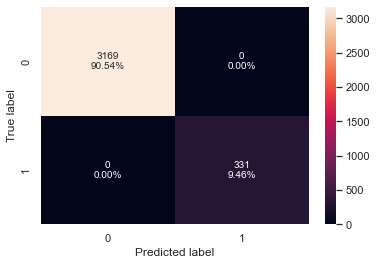

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [124]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.8942598187311178


<IPython.core.display.Javascript object>

#### Decision Tree Model 1 : Checking model performance on Test set

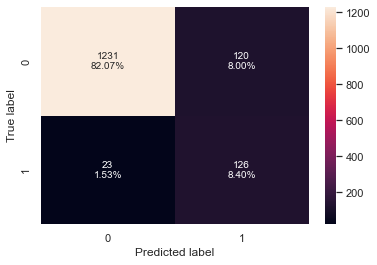

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(model, X_test, y_test)

In [126]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8456375838926175


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

In [127]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

In [128]:
from sklearn import tree

<IPython.core.display.Javascript object>

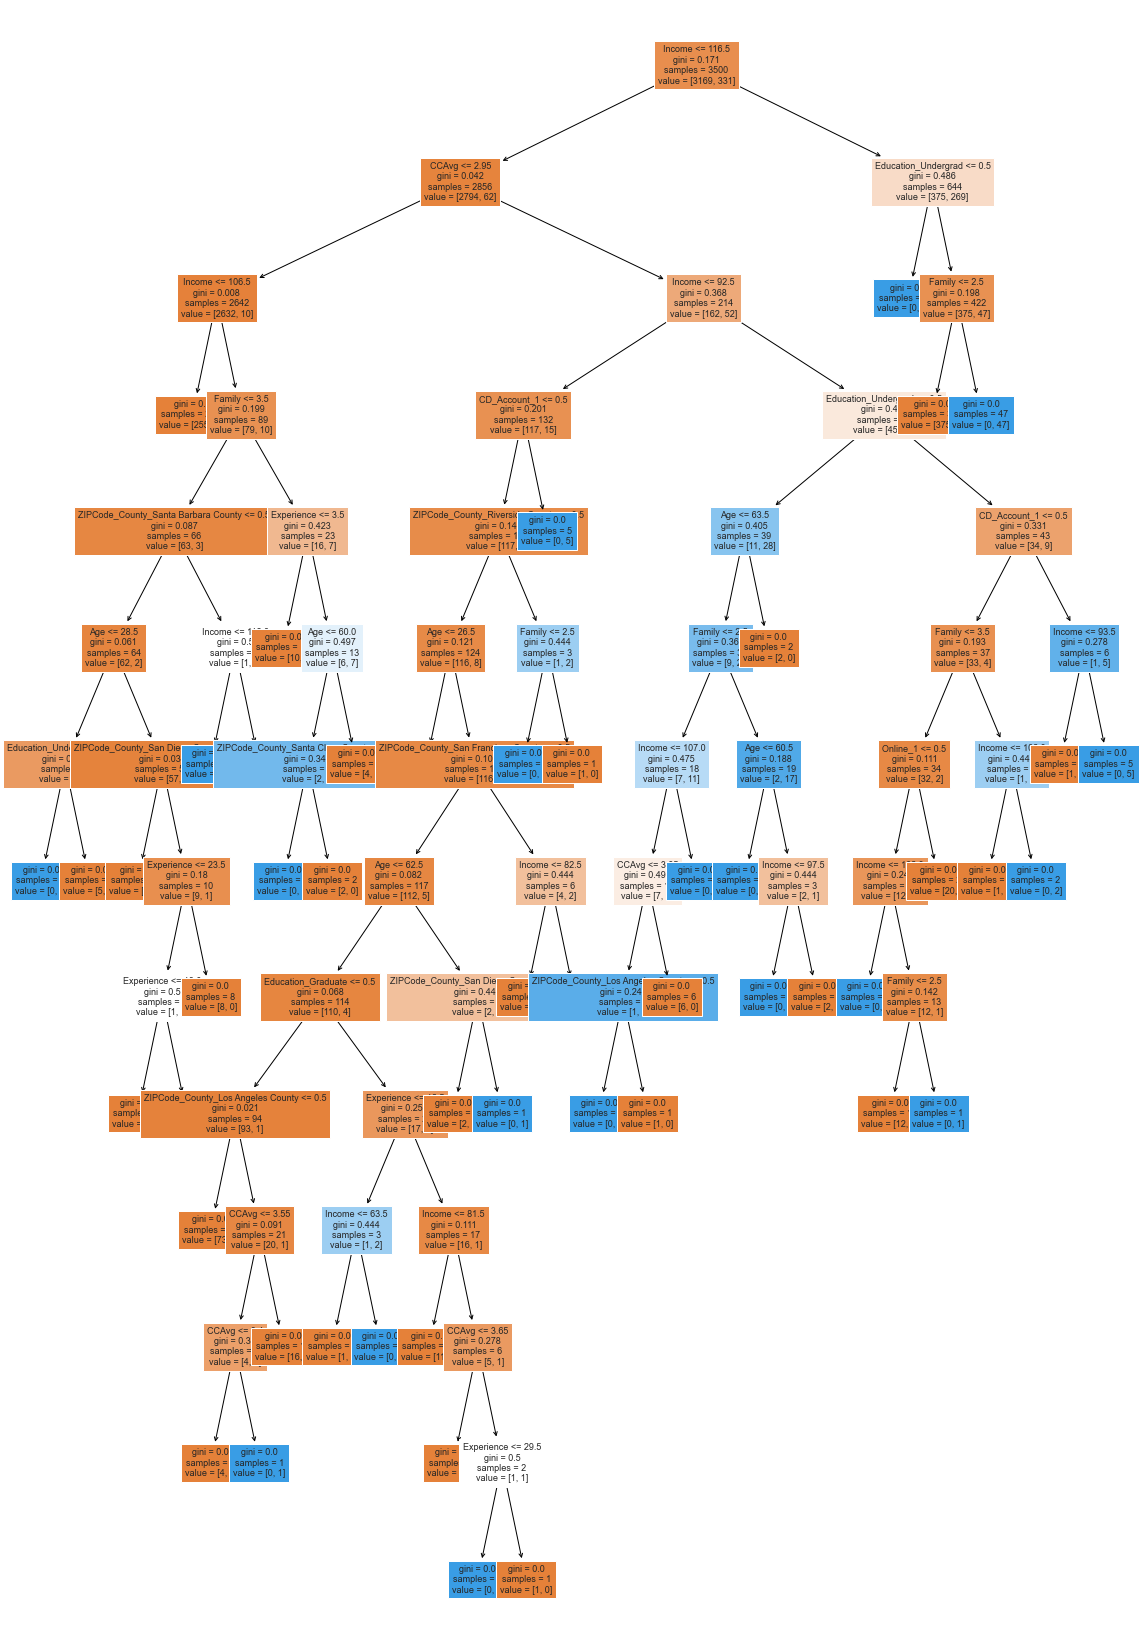

<IPython.core.display.Javascript object>

In [129]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [130]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_County_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- ZIPCode_County_San Diego County <= 0.50
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_County_San Diego County >  0.50
|   |   |   |   |   |   |   |--- Experience <= 23.50
|   |   |   |   |   |   |   |   |--- Experience <= 19.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Experie

<IPython.core.display.Javascript object>

In [131]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Education_Undergrad                    0.403732
Income                                 0.319881
Family                                 0.154357
CCAvg                                  0.050006
CD_Account_1                           0.022684
Age                                    0.017178
Experience                             0.013283
ZIPCode_County_Santa Clara County      0.005190
ZIPCode_County_Riverside County        0.003544
ZIPCode_County_Los Angeles County      0.002983
ZIPCode_County_San Diego County        0.002501
ZIPCode_County_San Francisco County    0.001608
ZIPCode_County_Santa Barbara County    0.001422
Education_Graduate                     0.001069
Online_1                               0.000561
ZIPCode_County_Unknown                 0.000000
ZIPCode_County_San Joaquin County      0.000000
ZIPCode_County_Yolo County             0.000000
ZIPCode_County_San Luis Obispo County  0.000000
ZIPCode_County_San Mateo County        0

<IPython.core.display.Javascript object>

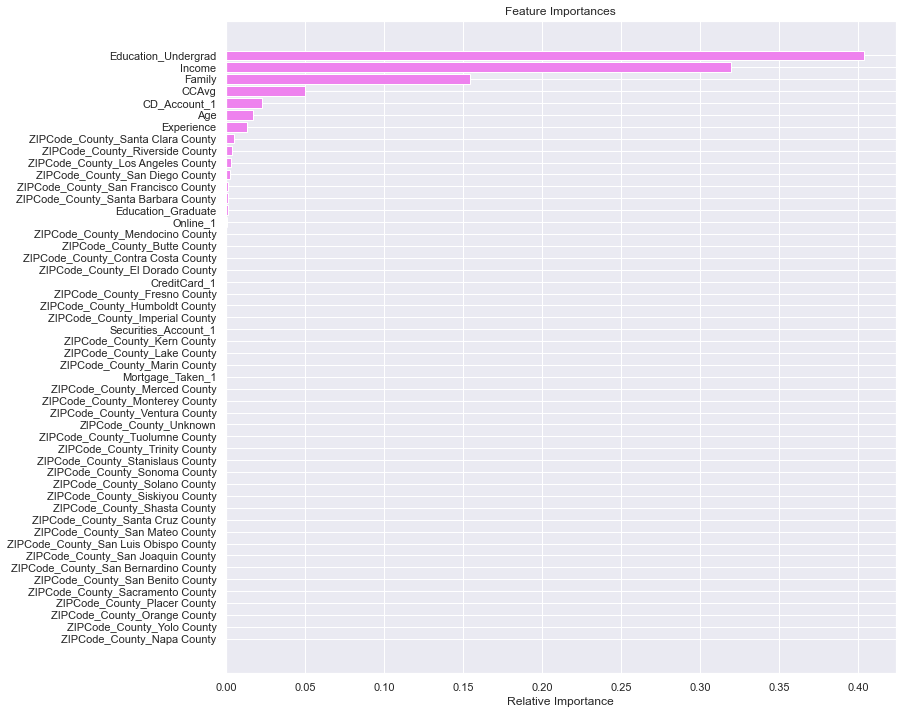

<IPython.core.display.Javascript object>

In [132]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Key variables that have a strong relationship with the dependent variable

1) Education_Undergrad                  
2) Income                               
3) Family                               
4) CCAvg                                 
5) CD_Account_1                           
6) Age                                    
7) Experience                            

#### Comments on Model 1 performance

* Recall score is 0.8456375838926175 which is good. Lets try to improve this score.

### 10. Model performance evaluation and improvement

### Pre-Pruning

#### Using GridSearch for Hyperparameter tuning of our tree model

In [133]:
from sklearn.metrics import make_scorer

<IPython.core.display.Javascript object>

In [134]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

#### Decision Tree Model 2 : Checking model performance on Training set

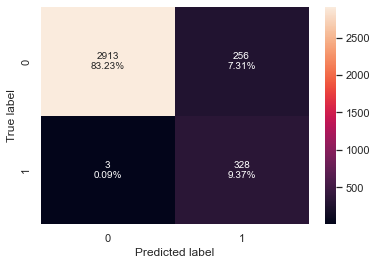

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [136]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

#### Decision Tree Model 2 : Checking model performance on Test set

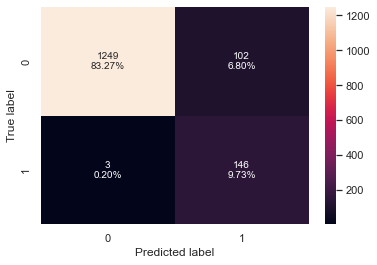

<IPython.core.display.Javascript object>

In [137]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [138]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9798657718120806


<IPython.core.display.Javascript object>

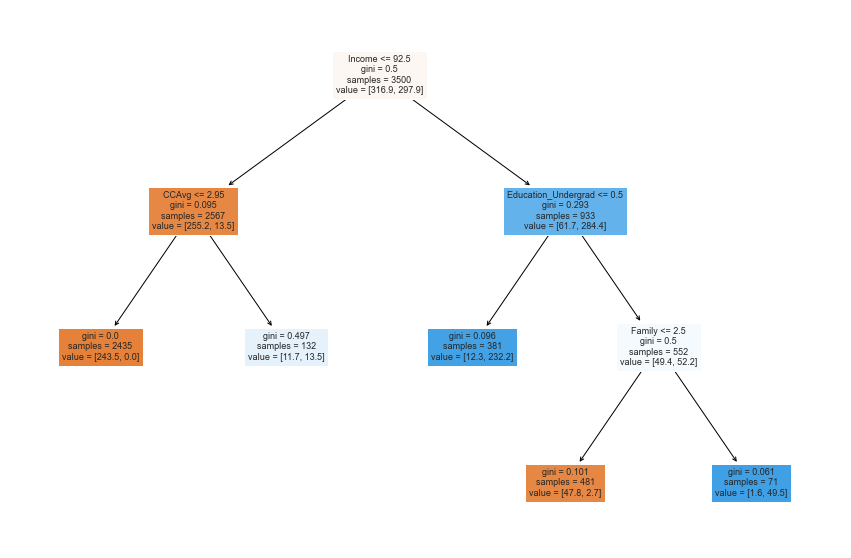

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- weights: [12.30, 232.20] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1



<IPython.core.display.Javascript object>

In [141]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                            Imp
Income                                 0.684653
Family                                 0.161790
Education_Undergrad                    0.103717
CCAvg                                  0.049840
Age                                    0.000000
ZIPCode_County_Santa Cruz County       0.000000
ZIPCode_County_San Benito County       0.000000
ZIPCode_County_San Bernardino County   0.000000
ZIPCode_County_San Diego County        0.000000
ZIPCode_County_San Francisco County    0.000000
ZIPCode_County_San Joaquin County      0.000000
ZIPCode_County_San Luis Obispo County  0.000000
ZIPCode_County_San Mateo County        0.000000
ZIPCode_County_Santa Barbara County    0.000000
ZIPCode_County_Santa Clara County      0.000000
ZIPCode_County_Solano County           0.000000
ZIPCode_County_Shasta County           0.000000
ZIPCode_County_Siskiyou County         0.000000
ZIPCode_County_Riverside County        0.000000
ZIPCode_County_Sonoma County           0

<IPython.core.display.Javascript object>

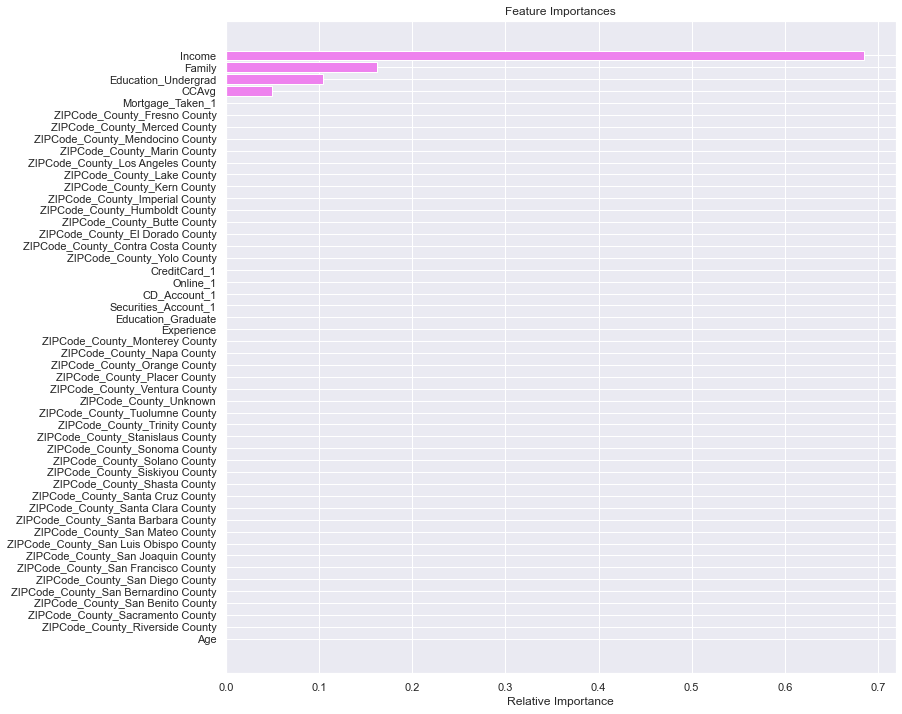

<IPython.core.display.Javascript object>

In [142]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Comments on Model 2 performance

* Recall score is 0.9798657718120806 which is good. Lets try to improve this score by Post-Pruning.

### Post-Pruning

### Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [143]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [144]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -2.568267e-15
1   5.056318e-19 -2.567761e-15
2   1.137672e-18 -2.566623e-15
3   1.444662e-18 -2.565179e-15
4   1.444662e-18 -2.563734e-15
5   2.600392e-18 -2.561134e-15
6   3.575539e-18 -2.557558e-15
7   9.029140e-18 -2.548529e-15
8   2.311460e-17 -2.525414e-15
9   2.345771e-17 -2.501957e-15
10  2.389110e-17 -2.478065e-15
11  4.543463e-17 -2.432631e-15
12  2.419448e-16 -2.190686e-15
13  6.068124e-15  3.877438e-15
14  1.568454e-04  3.136909e-04
15  1.591186e-04  6.319280e-04
16  1.632060e-04  9.583400e-04
17  2.159672e-04  1.606241e-03
18  2.920570e-04  1.898299e-03
19  2.927781e-04  2.483855e-03
20  3.136909e-04  2.797546e-03
21  3.136909e-04  3.111237e-03
22  3.173588e-04  3.745954e-03
23  3.219261e-04  4.067880e-03
24  3.707367e-04  5.921564e-03
25  3.767366e-04  7.428510e-03
26  5.275869e-04  7.956097e-03
27  5.425007e-04  8.498597e-03
28  5.646436e-04  9.063241e-03
29  5.990667e-04  9.662308e-03
30  6.750008e-04  1.033731e-02
31  7.342114e-04  1.107152e-02
32  8.510178e-04  1.192254e-02
33  9.300011e-04  1.285254e-02
34  9.615100e-04  1.381405e-02
35  1.029832e-03  1.690354e-02
36  1.058707e-03  1.796225e-02
37  1.126004e-03  1.908826e-02
38  1.416358e-03  2.192097e-02
39  1.582479e-03  2.350345e-02
40  1.743294e-03  2.699004e-02
41  2.389170e-03  3.176838e-02
42  3.240232e-03  3.500861e-02
43  3.470671e-03  4.194995e-02
44  3.841577e-03  4.579153e-02
45  4.760264e-03  5.055179e-02
46  1.059696e-02  7.174571e-02
47  2.132036e-02  9.306606e-02
48  5.678893e-02  2.066439e-01
49  2.928785e-01  4.995225e-01

<IPython.core.display.Javascript object>

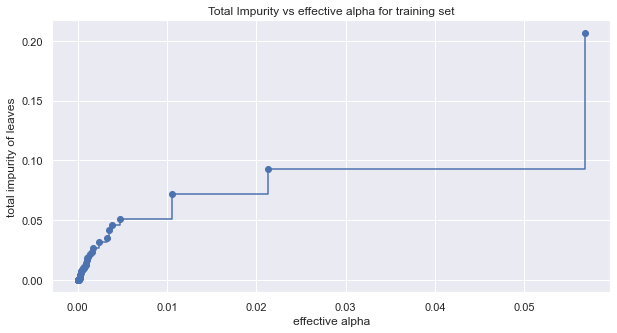

<IPython.core.display.Javascript object>

In [145]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [146]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2928785401980031


<IPython.core.display.Javascript object>

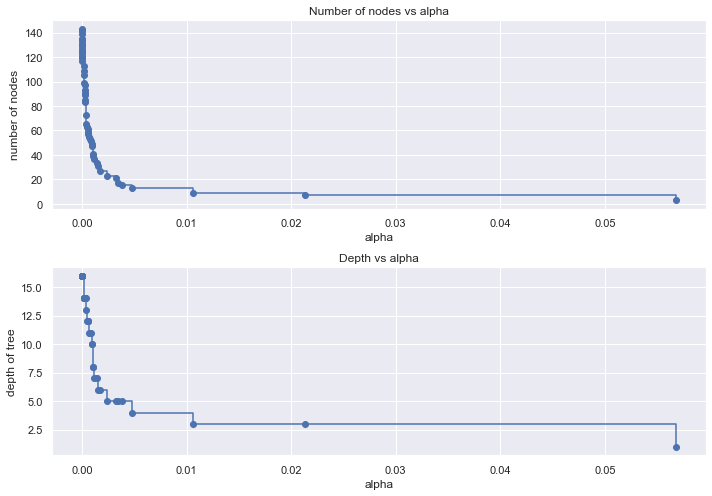

<IPython.core.display.Javascript object>

In [147]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [148]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [149]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [150]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

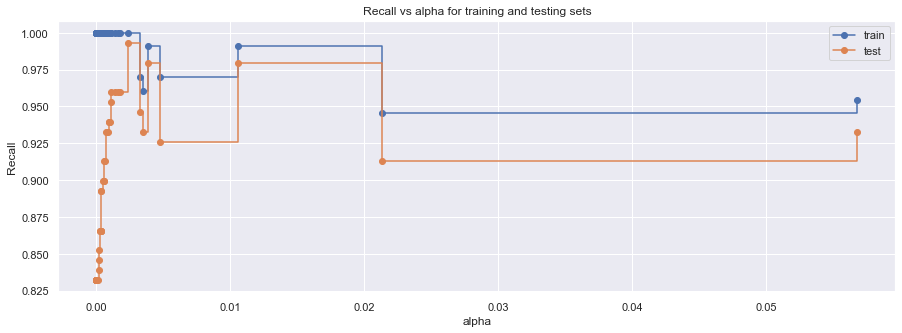

<IPython.core.display.Javascript object>

In [151]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [152]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0023891702127757245,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [153]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0023891702127757245,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Decision Tree Model 3 : Checking model performance on Training set

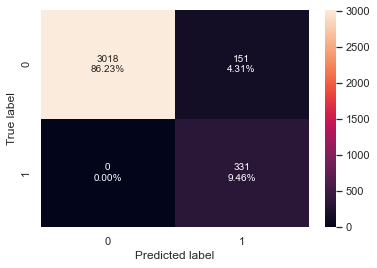

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [155]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

#### Decision Tree Model 3 : Checking model performance on Test set

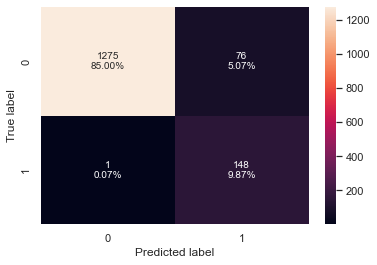

<IPython.core.display.Javascript object>

In [156]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [157]:
decision_tree_postpruned_perf_test = get_recall_score(best_model, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9932885906040269


<IPython.core.display.Javascript object>

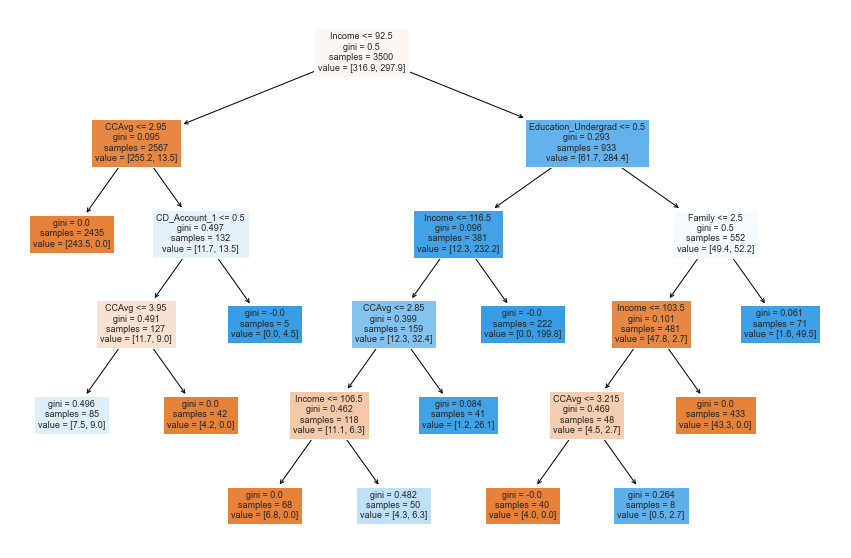

<IPython.core.display.Javascript object>

In [158]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [159]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [6.80, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [4.30, 6.30] class: 1
|   |   |   |--- CCAvg >  2.85
|   |   |   |   |--- weights: [1.20, 26.10] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 199.80] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21


<IPython.core.display.Javascript object>

In [160]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Income                                 0.661588
Family                                 0.147962
Education_Undergrad                    0.094853
CCAvg                                  0.087384
CD_Account_1                           0.008213
Age                                    0.000000
ZIPCode_County_Shasta County           0.000000
ZIPCode_County_San Bernardino County   0.000000
ZIPCode_County_San Diego County        0.000000
ZIPCode_County_San Francisco County    0.000000
ZIPCode_County_San Joaquin County      0.000000
ZIPCode_County_San Luis Obispo County  0.000000
ZIPCode_County_San Mateo County        0.000000
ZIPCode_County_Santa Barbara County    0.000000
ZIPCode_County_Santa Clara County      0.000000
ZIPCode_County_Santa Cruz County       0.000000
ZIPCode_County_Sonoma County           0.000000
ZIPCode_County_Siskiyou County         0.000000
ZIPCode_County_Solano County           0.000000
ZIPCode_County_Sacramento County       0

<IPython.core.display.Javascript object>

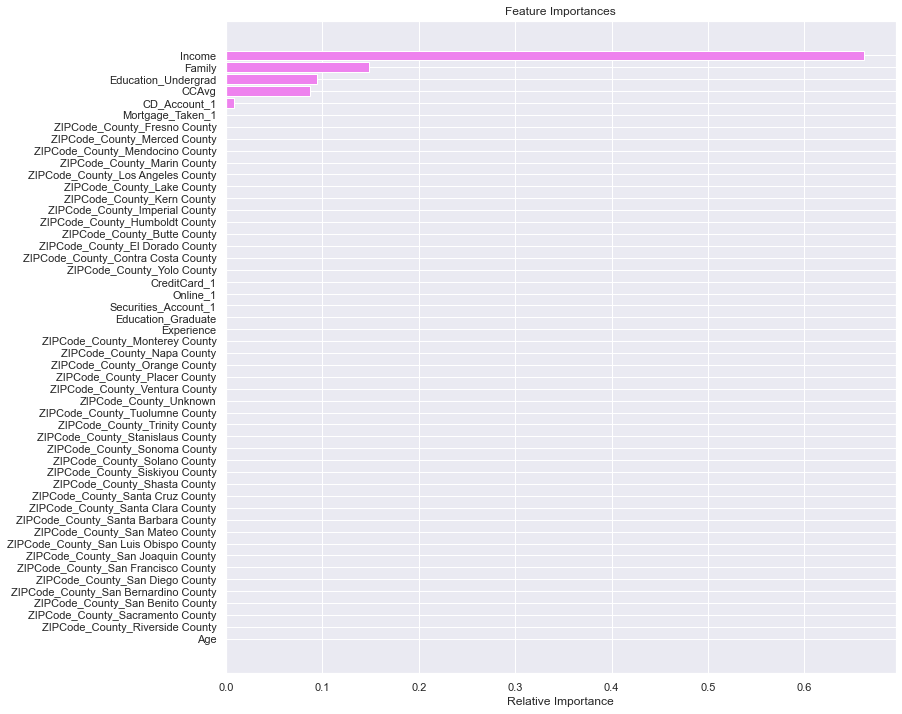

<IPython.core.display.Javascript object>

In [161]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Comments on Model 3 performance

* Recall score has improved further as 0.993289 which is good. This is the best model so far.

### Comparing all the decision tree models

In [162]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        pd.DataFrame(
            {"Recall Score": decision_tree_perf_train}, index=["Recall Score"],
        ),
        pd.DataFrame(
            {"Recall Score": decision_tree_tune_perf_train}, index=["Recall Score"],
        ),
        pd.DataFrame(
            {"Recall Score": decision_tree_postpruned_perf_train},
            index=["Recall Score"],
        ),
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn (Model 1)",
    "Decision Tree - Pre-Pruning (Model 2)",
    "Decision Tree - Post-Pruning (Model 3)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn (Model 1)  \
Recall Score                          0.89426   

              Decision Tree - Pre-Pruning (Model 2)  \
Recall Score                               0.990937   

              Decision Tree - Post-Pruning (Model 3)  
Recall Score                                     1.0

<IPython.core.display.Javascript object>

In [163]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        pd.DataFrame(
            {"Recall Score": decision_tree_perf_test}, index=["Recall Score"],
        ),
        pd.DataFrame(
            {"Recall Score": decision_tree_tune_perf_test}, index=["Recall Score"],
        ),
        pd.DataFrame(
            {"Recall Score": decision_tree_postpruned_perf_test},
            index=["Recall Score"],
        ),
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn (Model 1)",
    "Decision Tree - Pre-Pruning (Model 2)",
    "Decision Tree - Post-Pruning (Model 3)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn (Model 1)  \
Recall Score                         0.845638   

              Decision Tree - Pre-Pruning (Model 2)  \
Recall Score                               0.979866   

              Decision Tree - Post-Pruning (Model 3)  
Recall Score                                0.993289

<IPython.core.display.Javascript object>

### Conclusion

* Decision tree model with post-pruning (Model 3) has given the **best recall score of 1 on training data and 0.993289 on testing data**.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### 11. Compare Logistic Regression & Decision Tree Models

In [164]:
pd.DataFrame(
    {
        "Model": [
            "Logistic Regression : sklearn (Model 1)",
            "Logistic Regression : ROC-AUC (Model 2)",
            "Logistic Regression : Precision-Recall (Model 3)",
            "Decision Tree : sklearn (Model 1)",
            "Decision Tree : Pre-Pruning (Model 2)",
            "Decision Tree : Post-Pruning (Model 3)",
        ],
        "Training Recall Score": [
            np.float64(log_reg_model_train_perf["Recall"]),
            np.float64(log_reg_model_train_perf_threshold_auc_roc["Recall"]),
            np.float64(log_reg_model_train_perf_threshold_curve["Recall"]),
            decision_tree_perf_train,
            decision_tree_tune_perf_train,
            decision_tree_postpruned_perf_train,
        ],
        "Testing Recall Score": [
            np.float64(log_reg_model_test_perf["Recall"]),
            np.float64(log_reg_model_test_perf_threshold_auc_roc["Recall"]),
            np.float64(log_reg_model_test_perf_threshold_curve["Recall"]),
            decision_tree_perf_test,
            decision_tree_tune_perf_test,
            decision_tree_postpruned_perf_test,
        ],
    },
)

Model  Training Recall Score  \
0           Logistic Regression : sklearn (Model 1)               0.894260   
1           Logistic Regression : ROC-AUC (Model 2)               0.939577   
2  Logistic Regression : Precision-Recall (Model 3)               0.728097   
3                 Decision Tree : sklearn (Model 1)               0.894260   
4             Decision Tree : Pre-Pruning (Model 2)               0.990937   
5            Decision Tree : Post-Pruning (Model 3)               1.000000   

   Testing Recall Score  
0              0.845638  
1              0.926174  
2              0.637584  
3              0.845638  
4              0.979866  
5              0.993289

<IPython.core.display.Javascript object>

### 12. Actionable Insights & Recommendations

### Insights on each columns are listed below:


**1. ID (Customer ID) :** This column was unique. So made this index column.

**2. Age (Customer’s age in completed years) :** Age has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 45.338400 and 45 respectively.

**3. Experience (#years of professional experience) :** Experience has normal distribution without any outliers. So outlier treatment is not required. Mean and Median are almost same with values as 20.104600 and 20 respectively.

**4. Income (Annual income of the customer (in thousand dollars)) :** Income has rightly skewed distribution without outliers. **So outlier treatment is required**. Mean and Median are not same with values as 73.774200 and 64 respectively.

**5. ZIP Code (Home Address ZIP code) :** ZIPCode is a number. But, its not a continous numerical variable. It should be a categorical variable representing a location/area in USA. So feature engineering will be required before model building

**6. Family (the Family size of the customer) :** Family is a number which are in sequential order. The unique values are less. But, since values are in sequential order, it can be a numerical variable. **Most of customers have Family size 1.**

**7. CCAvg (Average spending on credit cards per month (in thousand dollars)) :** CCAvg has rightly skewed distribution with outliers. **So outlier treatment is required**. Mean and Median are not same with values as 1.937938 and 1.5 respectively.

**8. Education (Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional) :** Education is a number. Data dictionary says Education is categorized. So need to update categorical values into column "Education". **Most of customers are "Undergrad".**

**9. Mortgage (Value of house mortgage if any. (in thousand dollars)) :** Mortgage has heavily rightly skewed distribution with outliers. Mean and Median are not same with values as 56.498800  and 0 respectively. Standard deviation is very high at 101.713802. Almost 3500 rows from total 5000 rows are zero values. It may be genuine because customers may not have taken mortgage. So this data can be classified as whether mortgage was taken or not.

**10. Personal_Loan (Did this customer accept the personal loan offered in the last campaign?) :** Personal_Loan is the target variable. It is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It denotes whether customer accepted Personal Loan or not. It can be converted into categorical column. Its fine because both Logistic Regression and Decision Tree algorithm can predict categorical variables. **Most of customers did not accept Personal Loan in last campaign. Target is to get more customers to accept Personal Loan.**

**11. Securities_Account (Does the customer have securities account with the bank?) :** Securities_Account is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not have Securities Account.**

**12. CD_Account (Does the customer have a certificate of deposit (CD) account with the bank?) :** CD_Account is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not have CD Account.**

**13. Online (Do customers use internet banking facilities?) :** Online is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do use Online banking.**

**14. CreditCard (Does the customer use a credit card issued by any other Bank (excluding All life Bank)?) :** CreditCard is a numerical column. But, it has only two values "0" and "1" meaning "False" and "True". It can be converted into categorical column. **Most of customers do not use CreditCard.**



### Other Insights :

**1. Income vs Personal Loan:** There is high positive correlation between Income and Personal Loan. Customers with higher income has more chance to accept Personal Loan. Probably because they are confident to re-pay loan with their income. Also, banks sometimes checks Income to issue Personal Loan.

**2. CCAvg vs Personal Loan:** There is high positive correlation between Income and CCAvg Loan. Customers with lower CCAvg mostly dont accept Personal Loan. Probably they are not spending much money and their expenses are very low. So they dont need a Personal Loan. However, customers with high CCAvg accepts Personal Loan because their expenses are more and they spend more money in purchases. They may also want to pay off CCAvg balances with Personal Loan.

**3. Education vs Personal Loan:** There is positive correlation between Education and Personal Loan. Customers with higher Education of "Advanced/Professional" tend to accept Personal Loan more. Then comes "Graduate" and "Undergrad".

**4. Mortgage vs Personal Loan:** There is high positive correlation between Mortgage and CCAvg Loan. Customers with lower Mortgage mostly dont accept Personal Loan. Probably they have enough money because they are not paying any mortgages.

**5. CD_Account vs Personal Loan:** There is positive correlation between CD_Account and Personal Loan. Customers with CD_Account tend to accept Personal Loan more. Probably they have more income and are confident to pay back Personal Loan.

**6. Income vs CCAvg:** CCAvg (Credit Card Average Spending) increases as Income increases. Customers with higher Income and CCAvg tend to accept Personal Loan.

**7. Income vs Mortgage:** Mortgage increases as Income increases. Customers with higher Income and Mortgage tend to accept Personal Loan.

**8. CD_Account vs Income:** Most of customers with lower income do not have CD Account (certificate of deposit (CD) account with the bank). Customers with higher Income and have CD Account tend to accept Personal Loan.

**9. CD_Account vs CCAvg:** Most of customers with lower CCAvg (Average spending on credit cards per month) do not have CD Account (certificate of deposit (CD) account with the bank). Customers with higher CCAvg and have CD Account tend to accept Personal Loan.

**10. Education vs Income:** Most of the customers with lower Education (Undergrad) have higher Income. Customers with higher Education (both Graduate & Advanced/Professional) and higher income tend to accept Personal Loan.

**11. Family vs Income:** Most of the customers with lower Family size have higher Income. Customers with higher Family size and higher income tend to accept Personal Loan.

**12. Family vs CCAvg:** Most of the customers with lower Family size have higher CCAvg (Average spending on credit cards per month). Customers with higher Family size and higher CCAvg tend to accept Personal Loan.

**13. Education vs CCAvg:** Most of the customers with lower Education (Undergrad) have higher CCAvg (Average spending on credit cards per month). Customers with higher Education (both Graduate & Advanced/Professional) and higher CCAvg tend to accept Personal Loan


### Conclusion:

**A. Model Evaluation Criteria :** Most important factor is not to miss a customer who is going to accept Personal Loan just because model predicted that customer will not accept Personal Loan. So recall is the appropriate measure of success.


**B. Logistic Regression Model :** Model built with Threshold value of 0.39 has given a recall score of 0.939577 on the training set and 0.926174 on the testing set.

1) Training Data: 

    Accuracy : 0.886000 
    Recall : 0.939577 
    Precision : 0.450725	 
    F1 : 0.609207
    
2) Test Data: 

    Accuracy : 0.879333 
    Recall : 0.926174
    Precision : 0.448052	 
    F1 : 0.603939
    

**C. Decision Tree Model :** Model built with post-pruning (Model 3) has given the best recall score of 1.0 on training data and 0.993289 on testing data. Decision Tree model has been able to predict more effectively than Logistic Regression model. **Bank can use this model inorder to formulate policies to target more customers to accept Personal Loan.**

1) Training Data: 

    Recall : 1.0 
    
2) Test Data: 

    Recall : 0.993289


### Recommendations :

   1) Target customers with higher annual Income
   
   2) Dont target customers with very low Credit Card average spending per month
   
   3) Target customers with higher Education like "Advanced/Professional" and "Graduate" only. Dont target customers with Education "UnderGrad"
   
   4) Dont target customers with very low and no Mortages
   
   5) Target customers with certificate of deposit (CD) account with the bank
   
   6) Target customers with Family size of 4 and 3 only. Dont target customers with Family size of 1 and 2
